In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./shopping_population.csv", encoding='ISO-8859-1')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Population2023
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,4526154.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,1395722.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,7001399.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,1095962.0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,4233358.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family='Malgun Gothic')

def categorize_age(age):
    if age >= 10 and age < 20:
        return '10대'
    elif age >= 20 and age < 30:
        return '20대'
    elif age >= 30 and age < 40:
        return '30대'
    elif age >= 40 and age < 50:
        return '40대'
    elif age >= 50 and age < 60:
        return '50대'
    elif age >= 60 and age < 70:
        return '60대'
    else:
        return '70대'

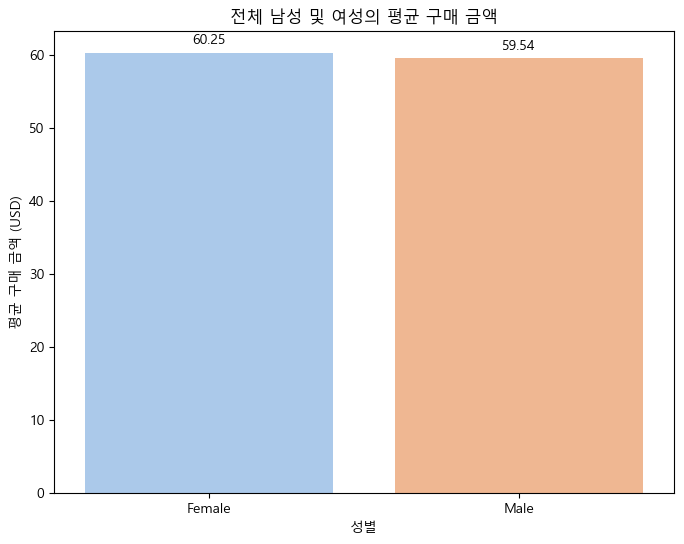

In [4]:
# 성별로 그룹화하여 전체 평균 구매 금액 계산
average_purchase = data.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Gender', y='Purchase Amount (USD)', data=average_purchase, palette='pastel')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.title('전체 남성 및 여성의 평균 구매 금액')
plt.ylabel('평균 구매 금액 (USD)')
plt.xlabel('성별')
plt.show()

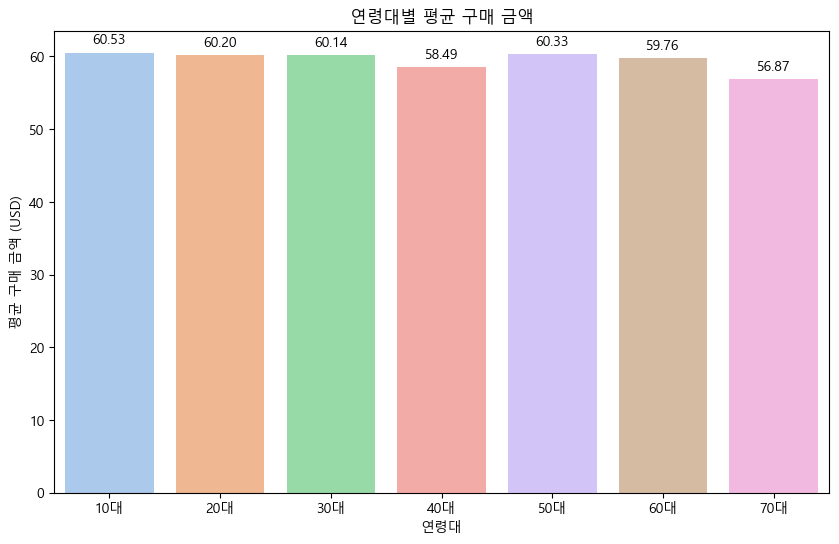

In [5]:
data['Age Group'] = data['Age'].apply(categorize_age)

# 나이대별로 그룹화하여 평균 구매 금액 계산
average_purchase_age = data.groupby('Age Group')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Age Group', y='Purchase Amount (USD)', data=average_purchase_age, palette='pastel')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.title('연령대별 평균 구매 금액')
plt.ylabel('평균 구매 금액 (USD)')
plt.xlabel('연령대')
plt.show()

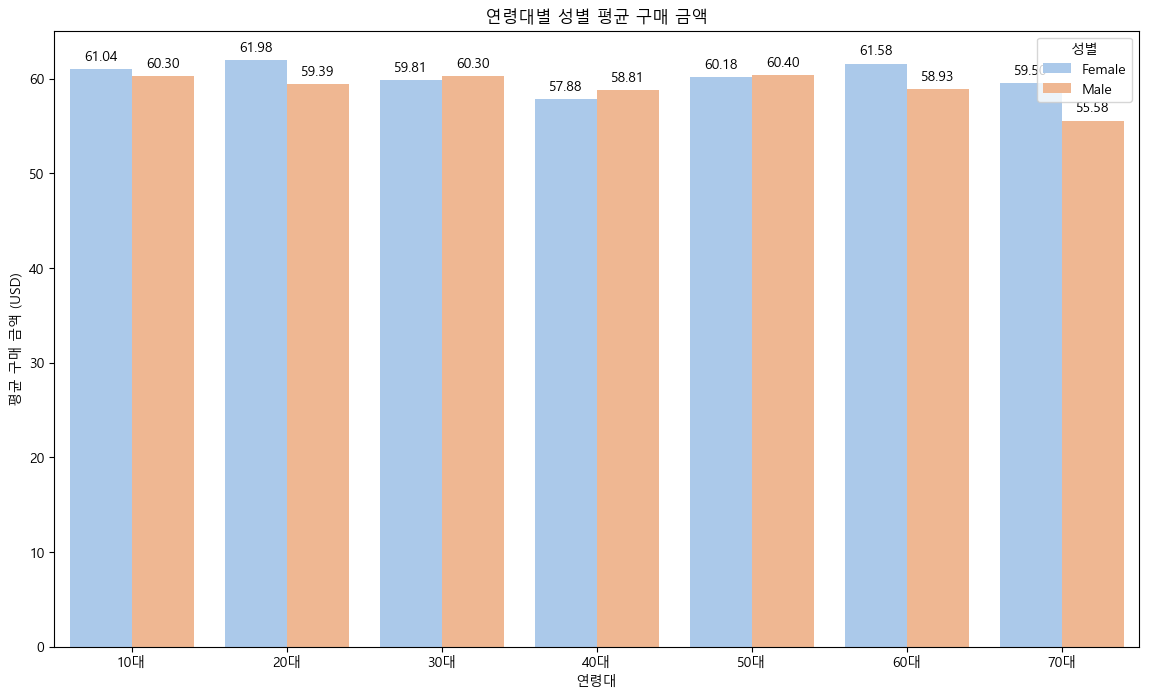

In [6]:
data['Age Group'] = data['Age'].apply(categorize_age)

# 나이대와 성별로 그룹화하여 평균 구매 금액 계산
average_purchase_age_gender = data.groupby(['Age Group', 'Gender'])['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='Age Group', y='Purchase Amount (USD)', hue='Gender', data=average_purchase_age_gender, palette='pastel')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.title('연령대별 성별 평균 구매 금액')
plt.ylabel('평균 구매 금액 (USD)')
plt.xlabel('연령대')
plt.legend(title='성별')
plt.show()

d:\Miniconda\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_22908\2274370219.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

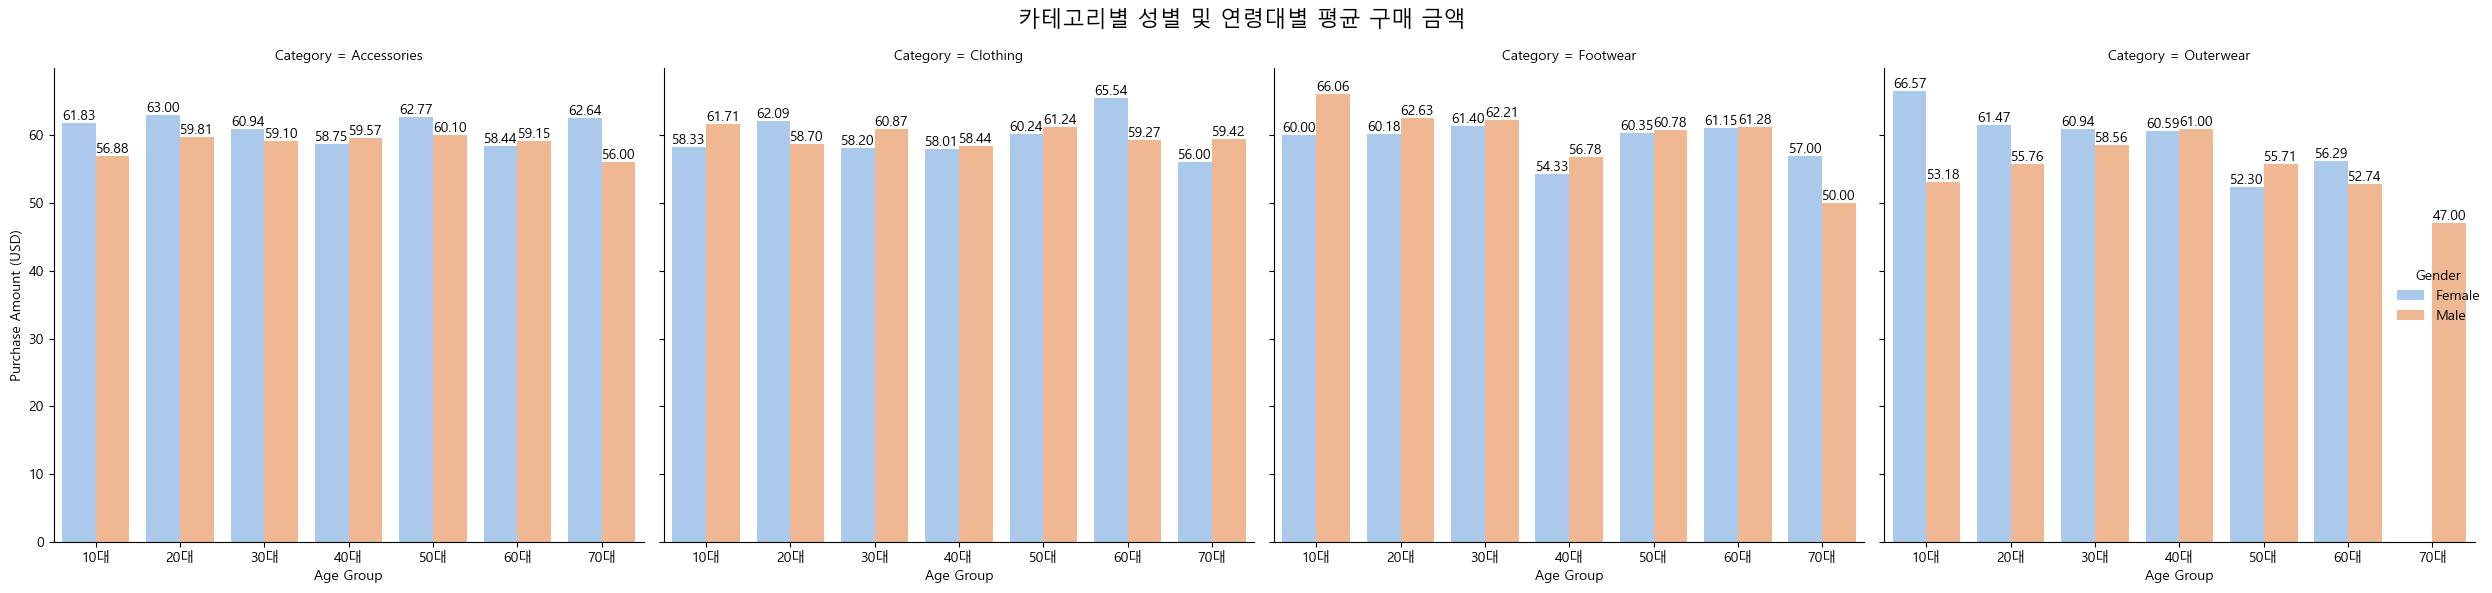

In [7]:
data['Age Group'] = data['Age'].apply(categorize_age)

# 카테고리별, 성별, 연령대별 평균 구매금액 산출
average_purchase_by_category_gender_age = data.groupby(['Category', 'Gender', 'Age Group'])['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(16, 10))
g = sns.catplot(
    x='Age Group', 
    y='Purchase Amount (USD)', 
    hue='Gender', 
    col='Category', 
    data=average_purchase_by_category_gender_age, 
    kind='bar', 
    palette='pastel', 
    height=6, 
    aspect=1
)

plt.subplots_adjust(top=0.9)
plt.suptitle('카테고리별 성별 및 연령대별 평균 구매 금액', fontsize=16)

for ax in g.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

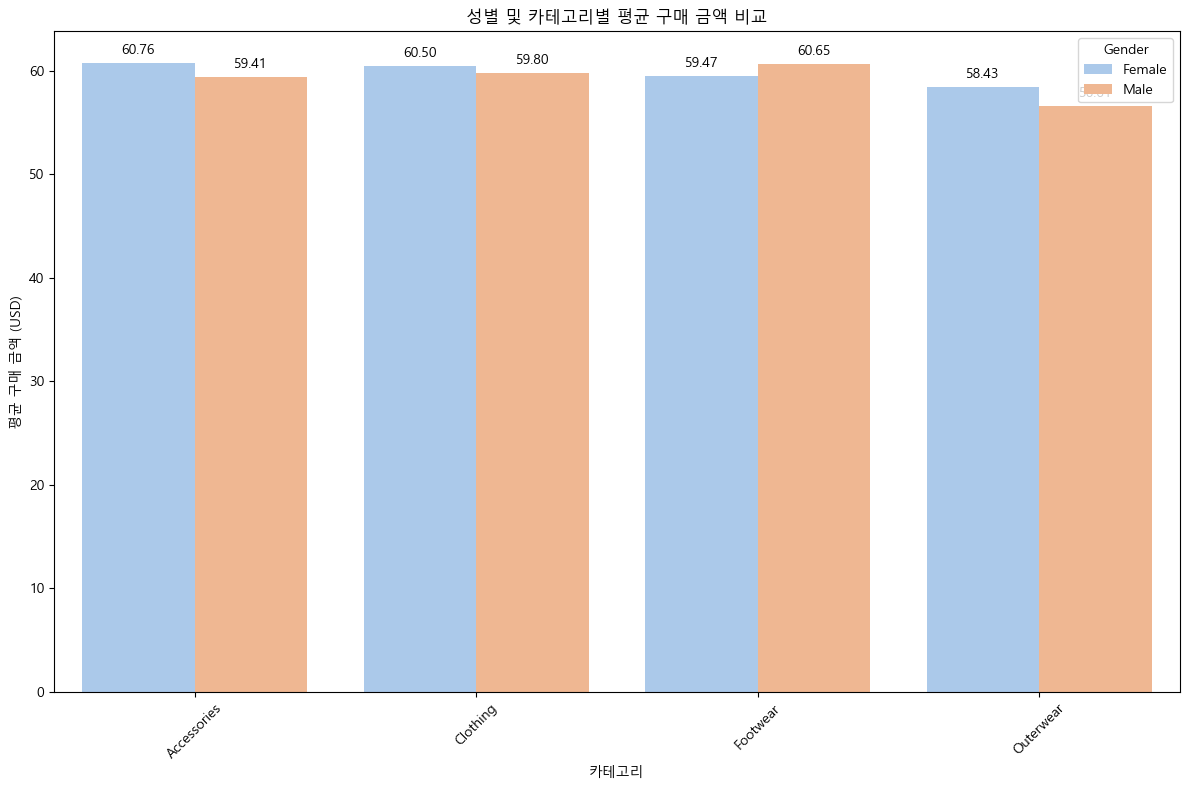

In [8]:
# 성별, 카테고리별 평균 구매 금액 계산
category_gender_avg_purchase = data.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Gender', data=category_gender_avg_purchase, palette='pastel')

# 바 라벨 추가
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.title('성별 및 카테고리별 평균 구매 금액 비교')
plt.xlabel('카테고리')
plt.ylabel('평균 구매 금액 (USD)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [9]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Population2023
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3.900000e+03
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,6.807546e+06
std,1125.977353,15.207589,23.685392,0.716223,14.447125,7.687667e+06
min,1.000000,18.000000,20.000000,2.500000,1.000000,5.840570e+05
25%,975.750000,31.000000,39.000000,3.100000,13.000000,1.964726e+06
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,4.573749e+06
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,7.812880e+06
max,3900.000000,70.000000,100.000000,5.000000,50.000000,3.896519e+07


In [10]:
data.describe(exclude='number')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases,Age Group
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months,50대
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584,771


In [11]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
Population2023            0
Age Group                 0
dtype: int64

In [12]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Population2023',
       'Age Group'],
      dtype='object')

In [13]:
# 구독회원 및 비구독 회원 
data['Subscription Status'].value_counts(1)

Subscription Status
No     0.73
Yes    0.27
Name: proportion, dtype: float64

In [14]:
# Location이 동떨어질수록 구독을 안하지 않을까?
data.loc[data['Subscription Status'] == 'No', 'Location'].value_counts()

Location
Idaho             74
Montana           71
Illinois          70
Alabama           67
California        66
New York          66
Maryland          66
Vermont           64
Tennessee         63
Wisconsin         62
Connecticut       62
Texas             62
Minnesota         62
Nebraska          62
North Dakota      59
Arkansas          59
Louisiana         59
New Mexico        59
Mississippi       59
Indiana           58
Maine             58
Delaware          58
Michigan          57
Nevada            57
Georgia           56
North Carolina    56
Oregon            56
Ohio              56
Kansas            55
New Hampshire     54
Missouri          54
Colorado          54
Alaska            54
South Dakota      53
Virginia          53
Pennsylvania      53
West Virginia     53
Kentucky          53
Washington        52
New Jersey        51
Wyoming           51
Utah              51
Oklahoma          50
Arizona           49
Massachusetts     49
South Carolina    49
Iowa              48
Flor

In [15]:
# State 약어 딕셔너리
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# 'state_id' 컬럼 추가
data['state_id'] = data['Location'].map(state_abbreviations)
data['state_id'].value_counts()

state_id
MT    96
CA    95
ID    93
IL    92
AL    89
MN    88
NE    87
NY    87
NV    87
MD    86
DE    86
VT    85
LA    84
ND    83
MO    81
WV    81
NM    81
MS    80
IN    79
GA    79
KY    79
AR    79
NC    78
CT    78
VA    77
OH    77
TN    77
TX    77
ME    77
SC    76
CO    75
OK    75
WI    75
OR    74
PA    74
WA    73
MI    73
AK    72
MA    72
WY    71
UT    71
NH    71
SD    70
IA    69
FL    68
NJ    67
HI    65
AZ    65
KS    63
RI    63
Name: count, dtype: int64

In [16]:
# Personal income 과의 상관 관계는 없을까?

# Personal income 데이터 불러오기
# 단위는 Millions of dollars (약 13억원)

income = pd.read_excel("./Personal Income by State.xlsx")
income[5:64] # 2열이 2023년도 데이터


# 주별 데이터 전처리
# 2023년도 데이터만 남기고, 인덱스 리셋

income_state = income.iloc[5:65, [0, 2]]
income_state.columns = ['Location', 'PersonalIncome2023']
income_state['Location'] = income_state['Location'].str.strip()
income_state.reset_index(drop=True)
income_state

,Location,PersonalIncome2023
5,United States,27360935.0
6,New England,1396676.0
7,Connecticut,340181.0
8,Maine,91081.0
9,Massachusetts,733860.0
10,New Hampshire,111102.0
11,Rhode Island,77322.0
12,Vermont,43130.0
13,Mideast,4697305.0
14,Delaware,93595.0


In [17]:
# state_shopping 에 Location 열을 기준으로 두 데이터프레임을 조인(left join)하여 병합
data = pd.merge(data, income_state, on='Location', how='left')

# 열 이름 변경
data.rename(columns={'PersonalIncome2023': 'income'}, inplace=True)

data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Population2023,Age Group,state_id,income
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,4526154.0,50대,KY,277747.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,1395722.0,10대,ME,91081.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,7001399.0,50대,MA,733860.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,1095962.0,20대,RI,77322.0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,4233358.0,40대,OR,316461.0
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,...,Standard,Yes,Yes,14,Venmo,Weekly,584057.0,40대,WY,50172.0
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,...,Free Shipping,Yes,Yes,49,Cash,Quarterly,1132812.0,60대,MT,70560.0
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,...,Free Shipping,Yes,Yes,19,Credit Card,Weekly,4573749.0,20대,LA,309601.0
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,...,Express,Yes,Yes,8,Venmo,Annually,1770071.0,20대,WV,99511.0
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,...,2-Day Shipping,Yes,Yes,4,Cash,Quarterly,6196156.0,50대,MO,422306.0


In [18]:
# 'Population2023' 열을 정규화
data['population_norm'] = data['Population2023'] / data['Population2023'].max()
# 데이터프레임의 income 열을 정규화
data['income_norm'] = data['income'] / data['income'].max()
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Population2023,Age Group,state_id,income,population_norm,income_norm
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,4526154.0,50대,KY,277747.0,0.116159,0.071915
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,1395722.0,10대,ME,91081.0,0.035820,0.023583
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,7001399.0,50대,MA,733860.0,0.179683,0.190012
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,1095962.0,20대,RI,77322.0,0.028127,0.020020
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,4233358.0,40대,OR,316461.0,0.108645,0.081939


In [19]:
sub_loc = data.groupby(['Location','Subscription Status']).agg({
    'Customer ID' : 'count',
    'population_norm' : 'mean',
    'income_norm' : 'mean'
}).unstack()

sub_loc.rename(columns={'Customer ID' : 'Subscription'}, inplace=True)

sub_loc['구독비율'] = sub_loc[('Subscription', 'Yes')] / (sub_loc[('Subscription', 'Yes')] + sub_loc[('Subscription', 'No')])
sub_loc['비구독비율'] = sub_loc[('Subscription', 'No')] / (sub_loc[('Subscription', 'Yes')] + sub_loc[('Subscription', 'No')])

# 구독율 상위 10개국 
sub_loc.nlargest(10, '구독비율')

Subscription     population_norm           income_norm  \
Subscription Status           No Yes              No       Yes          No   
Location                                                                     
South Carolina                49  27        0.137907  0.137907    0.083440   
West Virginia                 53  28        0.045427  0.045427    0.025766   
Nevada                        57  30        0.081975  0.081975    0.061985   
Missouri                      54  27        0.159018  0.159018    0.109344   
Oklahoma                      50  25        0.104037  0.104037    0.065801   
Kentucky                      53  26        0.116159  0.116159    0.071915   
Delaware                      58  28        0.026482  0.026482    0.024234   
Massachusetts                 49  23        0.179683  0.179683    0.190012   
Virginia                      53  24        0.223679  0.223679    0.183080   
Florida                       47  21        0.580280  0.580280    0.408968   

                                   구독비율     비구독비율  
Subscription Status       Yes                      
Location                                           
South Carolina       0.083440  0.355263  0.644737  
West Virginia        0.025766  0.345679  0.654321  
Nevada               0.061985  0.344828  0.655172  
Missouri             0.109344  0.333333  0.666667  
Oklahoma             0.065801  0.333333  0.666667  
Kentucky             0.071915  0.329114  0.670886  
Delaware             0.024234  0.325581  0.674419  
Massachusetts        0.190012  0.319444  0.680556  
Virginia             0.183080  0.311688  0.688312  
Florida              0.408968  0.308824  0.691176

In [20]:
# 구독율 하위 10개국 
sub_loc.nlargest(10, '비구독비율')

Subscription     population_norm           income_norm  \
Subscription Status           No Yes              No       Yes          No   
Location                                                                     
Kansas                        55   8        0.075466  0.075466    0.058519   
Wisconsin                     62  13        0.151698  0.151698    0.107185   
Tennessee                     63  14        0.182894  0.182894    0.135478   
Texas                         62  15        0.782835  0.782835    0.663748   
Idaho                         74  19        0.050423  0.050423    0.030758   
Connecticut                   62  16        0.092831  0.092831    0.088080   
Michigan                      57  16        0.257596  0.257596    0.170627   
Maryland                      66  20        0.158610  0.158610    0.132640   
New Jersey                    51  16        0.238439  0.238439    0.206957   
Illinois                      70  22        0.322074  0.322074    0.280404   

                                   구독비율     비구독비율  
Subscription Status       Yes                      
Location                                           
Kansas               0.058519  0.126984  0.873016  
Wisconsin            0.107185  0.173333  0.826667  
Tennessee            0.135478  0.181818  0.818182  
Texas                0.663748  0.194805  0.805195  
Idaho                0.030758  0.204301  0.795699  
Connecticut          0.088080  0.205128  0.794872  
Michigan             0.170627  0.219178  0.780822  
Maryland             0.132640  0.232558  0.767442  
New Jersey           0.206957  0.238806  0.761194  
Illinois             0.280404  0.239130  0.760870

In [21]:
x = sub_loc.nlargest(10, '구독비율').loc[:, ('income_norm','Yes')]
y = sub_loc.nlargest(10, '비구독비율').loc[:, ('income_norm','Yes')]

x.mean(), y.mean()

(0.12245439158442233, 0.18743975862280565)

In [22]:
data.groupby('Subscription Status')['Gender'].value_counts()

Subscription Status  Gender
No                   Male      1599
                     Female    1248
Yes                  Male      1053
Name: count, dtype: int64

In [23]:
# 그렇다면 어떤 아이템에서 프로모 코드를 사용하는 비율이 높을까?
# 일단 전체적으로 아이템 구매 빈도를 살펴보면 
# 블라우스 > 주얼리 > 팬츠 > 셔츠 > 드레스 > 스웨터 > 재킷 > 벨트 순이다. 

data['Item Purchased'].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

In [24]:
promo_item = data.groupby(['Item Purchased','Promo Code Used']).agg({
    'Customer ID' : 'count',
}).unstack()

promo_item.rename(columns={'Customer ID' : 'Promo_used'}, inplace=True)

promo_item['사용 비율'] = promo_item[('Promo_used', 'Yes')] / (promo_item[('Promo_used', 'Yes')] + promo_item[('Promo_used', 'No')])
promo_item['미사용 비율'] = promo_item[('Promo_used', 'No')] / (promo_item[('Promo_used', 'Yes')] + promo_item[('Promo_used', 'No')])


In [25]:
item_price = data.groupby('Item Purchased')['Purchase Amount (USD)'].mean()
item_price

Item Purchased
Backpack      60.391608
Belt          59.844720
Blouse        60.877193
Boots         62.625000
Coat          57.608696
Dress         62.168675
Gloves        60.550000
Handbag       57.888889
Hat           60.876623
Hoodie        58.059603
Jacket        56.742331
Jeans         60.870968
Jewelry       58.538012
Pants         59.005848
Sandals       57.500000
Scarf         60.898089
Shirt         61.136095
Shoes         61.600000
Shorts        60.082803
Skirt         59.506329
Sneakers      59.551724
Socks         58.188679
Sunglasses    59.931677
Sweater       57.695122
T-shirt       62.911565
Name: Purchase Amount (USD), dtype: float64

In [26]:
promo_item['평균 금액'] = item_price
promo_item

Promo_used         사용 비율    미사용 비율      평균 금액
Promo Code Used         No Yes                               
Item Purchased                                               
Backpack                79  64  0.447552  0.552448  60.391608
Belt                    89  72  0.447205  0.552795  59.844720
Blouse                 113  58  0.339181  0.660819  60.877193
Boots                   77  67  0.465278  0.534722  62.625000
Coat                    82  79  0.490683  0.509317  57.608696
Dress                   91  75  0.451807  0.548193  62.168675
Gloves                  80  60  0.428571  0.571429  60.550000
Handbag                 92  61  0.398693  0.601307  57.888889
Hat                     77  77  0.500000  0.500000  60.876623
Hoodie                  83  68  0.450331  0.549669  58.059603
Jacket                  98  65  0.398773  0.601227  56.742331
Jeans                   67  57  0.459677  0.540323  60.870968
Jewelry                 95  76  0.444444  0.555556  58.538012
Pants                   90  81  0.473684  0.526316  59.005848
Sandals                101  59  0.368750  0.631250  57.500000
Scarf                   90  67  0.426752  0.573248  60.898089
Shirt                   98  71  0.420118  0.579882  61.136095
Shoes                   89  61  0.406667  0.593333  61.600000
Shorts                  89  68  0.433121  0.566879  60.082803
Skirt                   97  61  0.386076  0.613924  59.506329
Sneakers                73  72  0.496552  0.503448  59.551724
Socks                  107  52  0.327044  0.672956  58.188679
Sunglasses              95  66  0.409938  0.590062  59.931677
Sweater                 85  79  0.481707  0.518293  57.695122
T-shirt                 86  61  0.414966  0.585034  62.911565

In [27]:
# 프로모 코드 사용율 상위 10개 아이템  
promo_item.nlargest(10, '사용 비율')

Promo_used         사용 비율    미사용 비율      평균 금액
Promo Code Used         No Yes                               
Item Purchased                                               
Hat                     77  77  0.500000  0.500000  60.876623
Sneakers                73  72  0.496552  0.503448  59.551724
Coat                    82  79  0.490683  0.509317  57.608696
Sweater                 85  79  0.481707  0.518293  57.695122
Pants                   90  81  0.473684  0.526316  59.005848
Boots                   77  67  0.465278  0.534722  62.625000
Jeans                   67  57  0.459677  0.540323  60.870968
Dress                   91  75  0.451807  0.548193  62.168675
Hoodie                  83  68  0.450331  0.549669  58.059603
Backpack                79  64  0.447552  0.552448  60.391608

In [28]:
promo_item.nlargest(10, '사용 비율')['평균 금액'].mean()

59.88538665525099

In [29]:
# 프로모 코드 미사용율 상위 10개 아이템  
promo_item.nlargest(10, '미사용 비율')

Promo_used         사용 비율    미사용 비율      평균 금액
Promo Code Used         No Yes                               
Item Purchased                                               
Socks                  107  52  0.327044  0.672956  58.188679
Blouse                 113  58  0.339181  0.660819  60.877193
Sandals                101  59  0.368750  0.631250  57.500000
Skirt                   97  61  0.386076  0.613924  59.506329
Handbag                 92  61  0.398693  0.601307  57.888889
Jacket                  98  65  0.398773  0.601227  56.742331
Shoes                   89  61  0.406667  0.593333  61.600000
Sunglasses              95  66  0.409938  0.590062  59.931677
T-shirt                 86  61  0.414966  0.585034  62.911565
Shirt                   98  71  0.420118  0.579882  61.136095

In [30]:
promo_item.nlargest(10, '미사용 비율')['평균 금액'].mean()

59.62827578379358

In [31]:
# 그렇다면 인기 아이템 상위 10개의 프로모 코드 적용 현황은 어떻게 될까??
# 인기아이템 상위 10개를 리스트에 담아두자 
top10_item = data['Item Purchased'].value_counts()[:10].index.tolist()
top10_item

['Blouse',
 'Jewelry',
 'Pants',
 'Shirt',
 'Dress',
 'Sweater',
 'Jacket',
 'Belt',
 'Sunglasses',
 'Coat']

In [32]:
promo_item.mean()

            Promo Code Used
Promo_used  No                 88.920000
            Yes                67.080000
사용 비율                           0.430703
미사용 비율                          0.569297
평균 금액                          59.802010
dtype: float64

In [33]:
# top10_item 만 추출 
promo_item.loc[top10_item, :]

Promo_used         사용 비율    미사용 비율      평균 금액
Promo Code Used         No Yes                               
Item Purchased                                               
Blouse                 113  58  0.339181  0.660819  60.877193
Jewelry                 95  76  0.444444  0.555556  58.538012
Pants                   90  81  0.473684  0.526316  59.005848
Shirt                   98  71  0.420118  0.579882  61.136095
Dress                   91  75  0.451807  0.548193  62.168675
Sweater                 85  79  0.481707  0.518293  57.695122
Jacket                  98  65  0.398773  0.601227  56.742331
Belt                    89  72  0.447205  0.552795  59.844720
Sunglasses              95  66  0.409938  0.590062  59.931677
Coat                    82  79  0.490683  0.509317  57.608696

In [34]:
# 나이를 구분하는 함수 정의
def categorize_age(age):
    if age >= 10 and age < 20:
        return '10대'
    elif age >=20 and age < 30:
        return '20대'
    elif age >= 30 and age < 40:
        return '30대'
    elif age >=40 and age < 50:
        return '40대'
    elif age >=50 and age < 60:
        return '50대'
    elif age >=60 and age < 70:
        return '60대'
    else:
        return '70대'
    
# apply 함수를 사용하여 나이대 컬럼도 추가하기 
data['Age_cat'] = data['Age'].apply(categorize_age)

# null 값이 있는지 확인 
data['Age_cat'].isnull().sum()

0

In [35]:
pd.crosstab(data['Age_cat'], data['Item Purchased']).loc[:, ['Blouse', 'Jacket']]

Item Purchased,Blouse,Jacket
Age_cat,,
10대,6,7
20대,30,21
30대,34,29
40대,27,41
50대,42,25
60대,30,38
70대,2,2


In [36]:
promo_item_spec = data.groupby(['Age_cat','Gender','Item Purchased'])['Customer ID'].count().unstack()[['Blouse','Jacket']]
promo_item_spec

Item Purchased  Blouse  Jacket
Age_cat Gender                
10대     Female     2.0     2.0
        Male       4.0     5.0
20대     Female    12.0     6.0
        Male      18.0    15.0
30대     Female    13.0     9.0
        Male      21.0    20.0
40대     Female    10.0    13.0
        Male      17.0    28.0
50대     Female    17.0    10.0
        Male      25.0    15.0
60대     Female    11.0    14.0
        Male      19.0    24.0
70대     Female     1.0     NaN
        Male       1.0     2.0

In [37]:
# 블라우스 우수 고객 군 
promo_item_spec['Blouse'].unstack().max()

Gender
Female    17.0
Male      25.0
dtype: float64

In [38]:
# 재킷 우수 고객 군 
promo_item_spec['Jacket'].unstack().max()

Gender
Female    14.0
Male      28.0
dtype: float64

## RFM 모델 분석

In [39]:
rfm_data = data[['Customer ID', 'Previous Purchases', 'Frequency of Purchases', 'Purchase Amount (USD)']].set_index('Customer ID')
rfm_data

,Previous Purchases,Frequency of Purchases,Purchase Amount (USD)
Customer ID,,,
1,14,Fortnightly,53
2,2,Fortnightly,64
3,23,Weekly,73
4,49,Weekly,90
5,31,Annually,49
...,...,...,...
3896,32,Weekly,28
3897,41,Bi-Weekly,49
3898,24,Quarterly,33


In [40]:
# Frequency of Purchases를 days로 바꿈 
# Weekly(7) / Bi-weekly & Fortnightly(14) / Monthly(30)
# Quarterly & Every 3 Months(90) / Annually(360)

fre_dict = {
    'Weekly' : 7, 
    'Bi-Weekly' : 14, 
    'Fortnightly' : 14, 
    'Monthly' : 30,
    'Quarterly' : 90, 
    'Every 3 Months' : 90, 
    'Annually' : 360
}

# mapping
rfm_data['Recency'] = rfm_data['Frequency of Purchases'].map(fre_dict)

# Recency (카테고리형) 기준으로 점수 부여 
score_dict = {
    7 : 5, 
    14 : 4, 
    30 : 3, 
    90 : 2, 
    360 : 1
}

rfm_data['R'] = rfm_data['Recency'].map(score_dict)
rfm_data


,Previous Purchases,Frequency of Purchases,Purchase Amount (USD),Recency,R
Customer ID,,,,,
1,14,Fortnightly,53,14,4
2,2,Fortnightly,64,14,4
3,23,Weekly,73,7,5
4,49,Weekly,90,7,5
5,31,Annually,49,360,1
...,...,...,...,...,...
3896,32,Weekly,28,7,5
3897,41,Bi-Weekly,49,14,4
3898,24,Quarterly,33,90,2


In [41]:
# Previous Purchase / Purchase Amount (USD) 점수로 변환 
# 데이터를 5등간격으로 나누어 각각 카테고리에 점수 부여 
# 수치가 높을 수록 높은 점수 부여
pre_labels = list(range(1,6)) 
pur_labels = list(range(1,6))
cut_size = 5

In [42]:
pre_qcut = pd.qcut(x=rfm_data['Previous Purchases'], q=cut_size, labels=pre_labels)
pre_qcut.value_counts(1)
# 약 20% 비율로 나눔 

Previous Purchases
3    0.202564
1    0.201026
4    0.201026
2    0.199231
5    0.196154
Name: proportion, dtype: float64

In [43]:
pur_qcut = pd.qcut(x=rfm_data['Purchase Amount (USD)'], q=cut_size, labels=pur_labels)
pur_qcut.value_counts(1)
# 약 20% 비율로 나눔

Purchase Amount (USD)
1    0.206923
3    0.205128
5    0.199744
2    0.196923
4    0.191282
Name: proportion, dtype: float64

In [44]:
# assign을 사용하면 여러 변수를 한번에 만들 수 있음 
rfm_data = rfm_data.assign(F=pre_qcut, M=pur_qcut)
rfm_data.head()

,Previous Purchases,Frequency of Purchases,Purchase Amount (USD),Recency,R,F,M
Customer ID,,,,,,,
1,14,Fortnightly,53,14,4,2,3
2,2,Fortnightly,64,14,4,1,3
3,23,Weekly,73,7,5,3,4
4,49,Weekly,90,7,5,5,5
5,31,Annually,49,360,1,4,2


In [45]:
# RFM_segment 값을 구합니다 
# R, F, M 값을 문자 그대로 붙여서 세그먼트를 구분합니다 
# rfm_data['RFM_segment']
rfm_data['RFM_segment'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)
rfm_data.head()

,Previous Purchases,Frequency of Purchases,Purchase Amount (USD),Recency,R,F,M,RFM_segment
Customer ID,,,,,,,,
1,14,Fortnightly,53,14,4,2,3,423
2,2,Fortnightly,64,14,4,1,3,413
3,23,Weekly,73,7,5,3,4,534
4,49,Weekly,90,7,5,5,5,555
5,31,Annually,49,360,1,4,2,142


In [46]:
# R, F, M 값의 합계를 구해서 세그먼트 점수를 구합니다. 
rfm_data['RFM_score'] = rfm_data[['R','F','M']].astype(int).sum(axis=1)
rfm_data.head()

,Previous Purchases,Frequency of Purchases,Purchase Amount (USD),Recency,R,F,M,RFM_segment,RFM_score
Customer ID,,,,,,,,,
1,14,Fortnightly,53,14,4,2,3,423,9
2,2,Fortnightly,64,14,4,1,3,413,8
3,23,Weekly,73,7,5,3,4,534,12
4,49,Weekly,90,7,5,5,5,555,15
5,31,Annually,49,360,1,4,2,142,7


In [47]:
del rfm_data['Frequency of Purchases']
rfm_data

,Previous Purchases,Purchase Amount (USD),Recency,R,F,M,RFM_segment,RFM_score
Customer ID,,,,,,,,
1,14,53,14,4,2,3,423,9
2,2,64,14,4,1,3,413,8
3,23,73,7,5,3,4,534,12
4,49,90,7,5,5,5,555,15
5,31,49,360,1,4,2,142,7
...,...,...,...,...,...,...,...,...
3896,32,28,7,5,4,1,541,10
3897,41,49,14,4,5,2,452,11
3898,24,33,90,2,3,1,231,6


In [48]:
# Recency 컬럼을 맨 앞으로 옮기기
cols = rfm_data.columns.tolist()
cols = ['Recency'] + [col for col in cols if col != 'Recency']
rfm_data = rfm_data[cols]
rfm_data

,Recency,Previous Purchases,Purchase Amount (USD),R,F,M,RFM_segment,RFM_score
Customer ID,,,,,,,,
1,14,14,53,4,2,3,423,9
2,14,2,64,4,1,3,413,8
3,7,23,73,5,3,4,534,12
4,7,49,90,5,5,5,555,15
5,360,31,49,1,4,2,142,7
...,...,...,...,...,...,...,...,...
3896,7,32,28,5,4,1,541,10
3897,14,41,49,4,5,2,452,11
3898,90,24,33,2,3,1,231,6


In [49]:
# 컬럼 이름 변경 
rfm_data.rename(columns={
    'Previous Purchases' : 'Frequency',
    'Purchase Amount (USD)' : 'MonetaryValue'
}, inplace=True)

rfm_data.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
Customer ID,,,,,,,,
1,14,14,53,4,2,3,423,9
2,14,2,64,4,1,3,413,8
3,7,23,73,5,3,4,534,12
4,7,49,90,5,5,5,555,15
5,360,31,49,1,4,2,142,7


<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

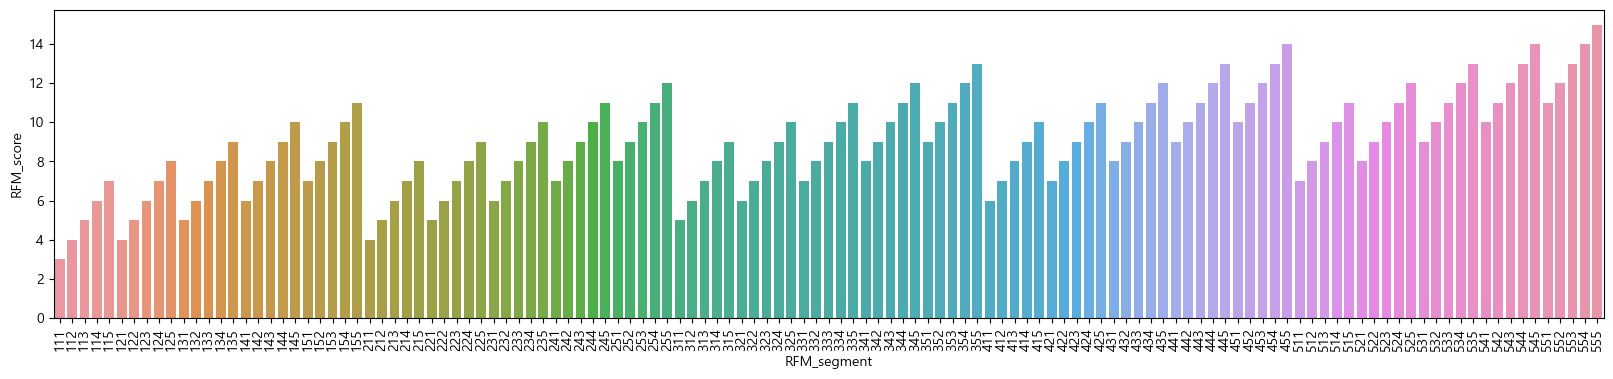

In [50]:
# RFM segment 값에 따라 정렬 
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
sns.barplot(data=rfm_data.sort_values('RFM_segment'), x='RFM_segment', y='RFM_score')

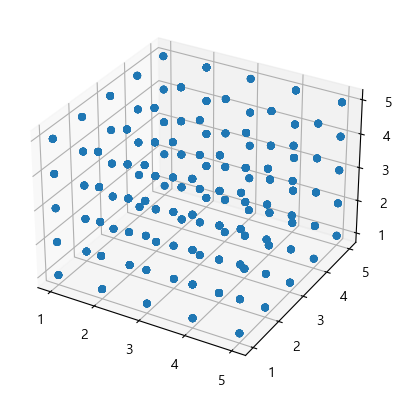

In [51]:
# 3차원 형태로 고객의 세그먼트 시각화
# F / M 값을 등간격으로 나누어서 세그먼트 빈도가 일정함 
ax = plt.axes(projection = '3d')
ax.scatter3D(rfm_data['R'], rfm_data['F'], rfm_data['M'])

In [52]:
from sklearn.preprocessing import StandardScaler

# RFM 데이터 표준화
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['R', 'F', 'M']])

In [55]:
from sklearn.cluster import KMeans

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)


AttributeError: 'NoneType' object has no attribute 'split'

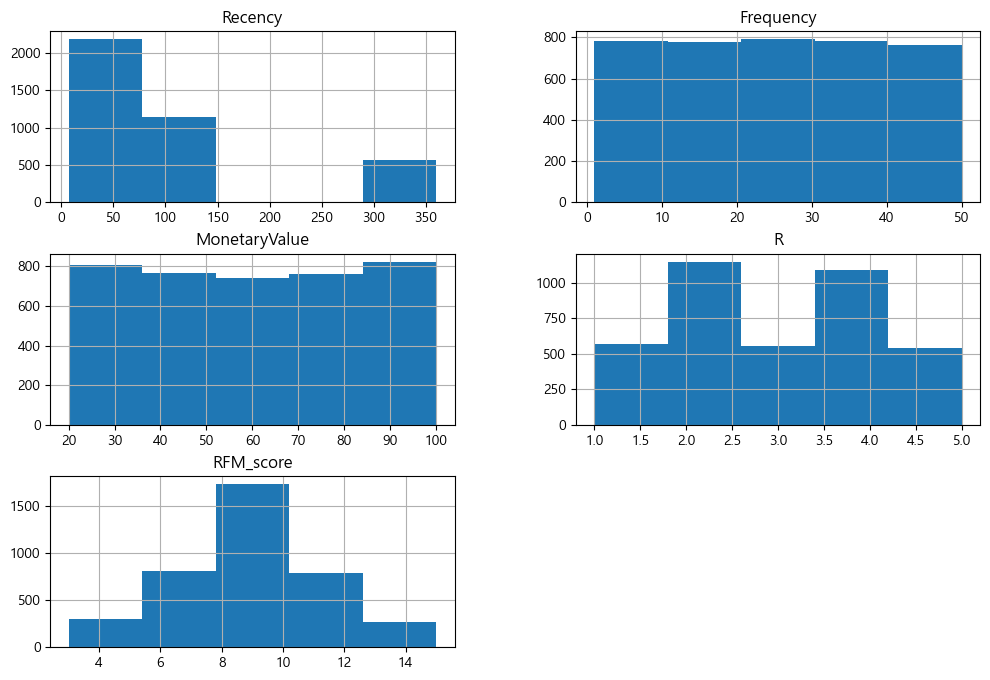

In [ ]:
rfm_data.hist(bins=5, figsize=(12,8));

In [ ]:
# RFM_score 별로 groupby 집계 
rfm_data.groupby('RFM_score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'MonetaryValue' : ['mean', 'sum']
}).style.background_gradient().format("{:,.0f}")

In [ ]:
rfm_data

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
Customer ID,,,,,,,,
1,14,14,53,4,2,3,423,9
2,14,2,64,4,1,3,413,8
3,7,23,73,5,3,4,534,12
4,7,49,90,5,5,5,555,15
5,360,31,49,1,4,2,142,7
...,...,...,...,...,...,...,...,...
3896,7,32,28,5,4,1,541,10
3897,14,41,49,4,5,2,452,11
3898,90,24,33,2,3,1,231,6


In [ ]:
# RFM 세그먼트 정의
def rfm_segment(row):
    if row['R'] >= 4 and row['F'] >= 4 and row['M'] >= 4:
        return 'VIP'
    elif row['R'] >= 3 and row['F'] >= 3 and row['M'] >= 3:
        return 'Loyal'
    elif row['R'] >= 4 and row['F'] <= 2 and row['M'] <= 2:
        return 'New'
    elif row['R'] == 3 and row['F'] == 3 and row['M'] >= 4:
        return 'Potential'
    elif row['R'] <= 2 and row['F'] <= 2 and row['M'] <= 2:
        return 'At Risk'
    else:
        return 'Others'

In [ ]:
# RFM 세그먼트 적용
rfm_data['Segment'] = rfm_data.apply(rfm_segment, axis=1)
rfm_data

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,Segment
Customer ID,,,,,,,,,
1,14,14,53,4,2,3,423,9,Others
2,14,2,64,4,1,3,413,8,Others
3,7,23,73,5,3,4,534,12,Loyal
4,7,49,90,5,5,5,555,15,VIP
5,360,31,49,1,4,2,142,7,Others
...,...,...,...,...,...,...,...,...,...
3896,7,32,28,5,4,1,541,10,Others
3897,14,41,49,4,5,2,452,11,Others
3898,90,24,33,2,3,1,231,6,Others


- VIP 고객: R, F, M 점수가 모두 높은 고객으로, 이들은 가장 가치 있는 고객입니다. 이들에게는 특별한 혜택이나 로열티 프로그램을 제공하여 지속적인 충성도를 유지할 수 있습니다.

- Loyal 고객: R, F, M 점수가 중간 이상인 고객으로, 이들은 꾸준히 구매를 하고 있는 충성 고객입니다. 이들에게는 정기적인 프로모션이나 보상을 제공하여 만족도를 높일 수 있습니다.

- New 고객: 최근에 구매했지만 Frequency와 Monetary 점수가 낮은 고객으로, 이들은 새로운 고객입니다. 이들에게는 환영 메시지와 함께 첫 구매 혜택을 제공하여 재구매를 유도할 수 있습니다.

- Potential 고객: Recency와 Frequency 점수가 중간이고, Monetary 점수가 높은 고객으로, 이들은 높은 가치를 지닌 잠재 고객입니다. 이들에게는 특별한 제안이나 맞춤형 프로모션을 제공하여 더 자주 구매하도록 유도할 수 있습니다.

- At Risk 고객: Recency가 낮고, Frequency와 Monetary 점수가 낮은 고객으로, 이들은 이탈 위험이 높은 고객입니다. 이들에게는 재구매를 유도하는 캠페인이나 특별 할인을 제공하여 다시 활성화할 수 있습니다.

- Others 고객: 위의 어떤 세그먼트에도 속하지 않는 고객으로, 이들은 혼합된 패턴을 가질 수 있습니다. 이들에게는 일반적인 마케팅 캠페인을 적용하거나 추가적인 분석을 통해 맞춤형 전략을 수립할 수 있습니다.

In [ ]:
# Segment별로 그룹화하고 통계 요약(describe) 값을 구함
segment_describe = rfm_data.groupby('Segment').describe()
segment_describe

Recency                                                          \
          count        mean         std   min   25%   50%    75%    max   
Segment                                                                   
At Risk   270.0  185.000000  129.177409  90.0  90.0  90.0  360.0  360.0   
Loyal     532.0   18.253759    9.149598   7.0  14.0  14.0   30.0   30.0   
New       271.0   11.649446    3.311986   7.0   7.0  14.0   14.0   14.0   
Others   2586.0  107.926914  124.409854   7.0  14.0  90.0   90.0  360.0   
VIP       241.0   11.792531    3.259363   7.0   7.0  14.0   14.0   14.0   

        Frequency             ...    R      RFM_score                       \
            count       mean  ...  75%  max     count       mean       std   
Segment                       ...                                            
At Risk     270.0   9.981481  ...  2.0  2.0     270.0   4.588889  0.793483   
Loyal       532.0  32.823308  ...  4.0  5.0     532.0  11.315789  1.049569   
New         271.0  10.254613  ...  5.0  5.0     271.0   7.332103  0.816748   
Others     2586.0  25.577726  ...  4.0  5.0    2586.0   8.663186  1.695327   
VIP         241.0  40.626556  ...  5.0  5.0     241.0  13.352697  0.853963   

                                       
          min   25%   50%   75%   max  
Segment                                
At Risk   3.0   4.0   5.0   5.0   6.0  
Loyal     9.0  11.0  11.0  12.0  13.0  
New       6.0   7.0   7.0   8.0   9.0  
Others    5.0   7.0   9.0  10.0  12.0  
VIP      12.0  13.0  13.0  14.0  15.0  

[5 rows x 40 columns]

- VIP: 평균 Recency 11.79일, 평균 Frequency 40.63회, 평균 R 점수 13.35
- Loyal: 평균 Recency 18.25일, 평균 Frequency 32.82회, 평균 R 점수 11.32
- New: 평균 Recency 11.65일, 평균 Frequency 10.25회, 평균 R 점수 7.33
- At Risk: 평균 Recency 185.0일, 평균 Frequency 9.98회, 평균 R 점수 4.59
- Others: 평균 Recency 107.93일, 평균 Frequency 25.58회, 평균 R 점수 8.66

In [ ]:
# 고객군을 단순하게 'silver', 'gold', 'platinum' 으로 나누어보자 
rfm_data['RFM_class'] = pd.qcut(x=rfm_data['RFM_score'], q=3, labels=['silver','gold','platinum'])
rfm_data

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,Segment,RFM_class
Customer ID,,,,,,,,,,
1,14,14,53,4,2,3,423,9,Others,gold
2,14,2,64,4,1,3,413,8,Others,silver
3,7,23,73,5,3,4,534,12,Loyal,platinum
4,7,49,90,5,5,5,555,15,VIP,platinum
5,360,31,49,1,4,2,142,7,Others,silver
...,...,...,...,...,...,...,...,...,...,...
3896,7,32,28,5,4,1,541,10,Others,gold
3897,14,41,49,4,5,2,452,11,Others,platinum
3898,90,24,33,2,3,1,231,6,Others,silver


In [ ]:
# RFM_class 별로 그룹화 하고 describe 값을 구해보자 
rfm_data.groupby('RFM_class')['RFM_score'].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,1700.0,6.726471,1.268491,3.0,6.0,7.0,8.0,8.0
gold,1148.0,9.474739,0.499579,9.0,9.0,9.0,10.0,10.0
platinum,1052.0,11.934411,1.038953,11.0,11.0,12.0,13.0,15.0


<Axes: xlabel='RFM_class', ylabel='RFM_score'>

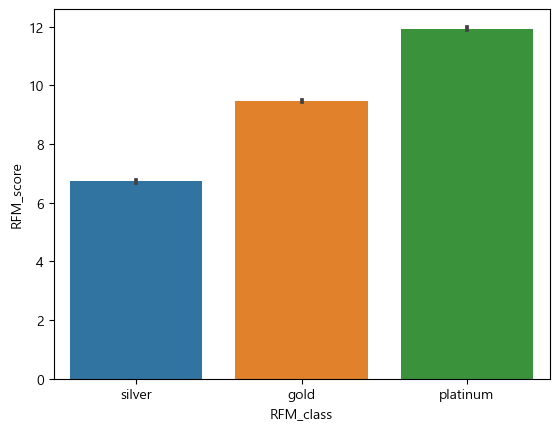

In [ ]:
# barplot으로 RFM_class 별 평균 RFM_score을 나타낸다 
sns.barplot(data=rfm_data, x='RFM_class', y='RFM_score')

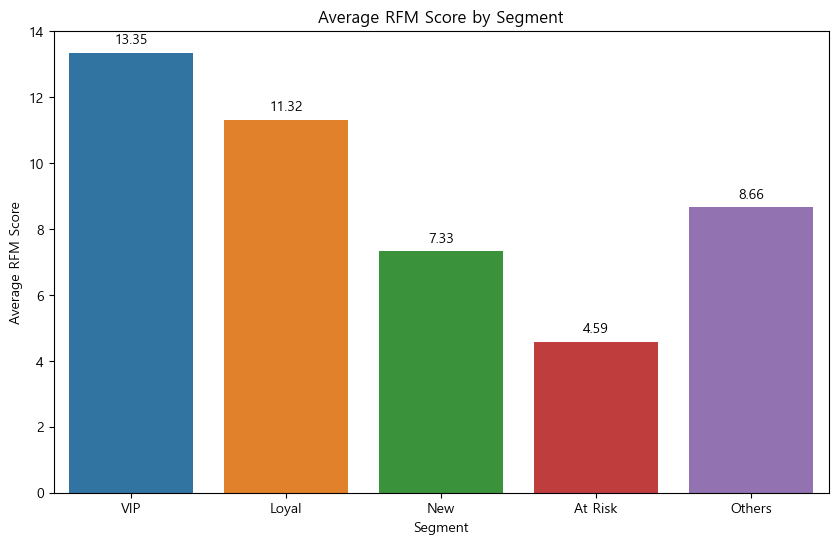

In [ ]:
# Segment별로 그룹화하고 평균 RFM_score 계산
rfm_data['RFM_score'] = rfm_data[['R', 'F', 'M']].sum(axis=1).astype(int)
segment_mean_rfm_score = rfm_data.groupby('Segment')['RFM_score'].mean().reset_index()

# 시각화 설정
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=segment_mean_rfm_score, x='Segment', y='RFM_score', order=['VIP', 'Loyal', 'New', 'At Risk', 'Others'])

# 각 막대 위에 평균 RFM 점수 표시
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Average RFM Score by Segment')
plt.xlabel('Segment')
plt.ylabel('Average RFM Score')
plt.show()

<Axes: xlabel='Segment', ylabel='RFM_score'>

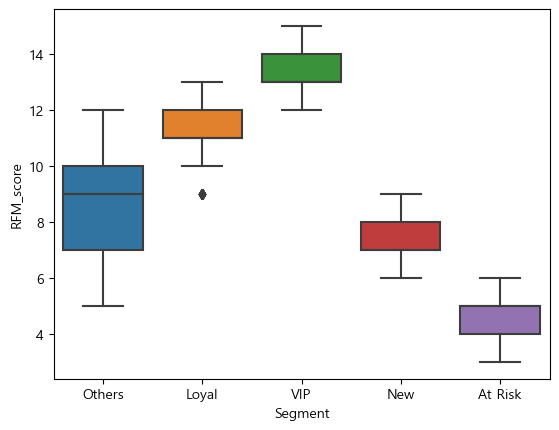

In [ ]:
# boxplot
sns.boxplot(data=rfm_data, x='Segment', y='RFM_score')

- VIP,Loyal,New,At Rist,Others 에 대한 RFM_score 평균 점수 시각화

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

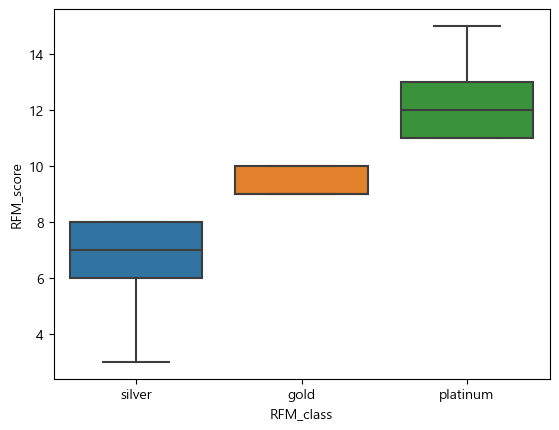

In [ ]:
# boxplot
sns.boxplot(data=rfm_data, x='RFM_class', y='RFM_score')

<Axes: xlabel='R', ylabel='RFM_score'>

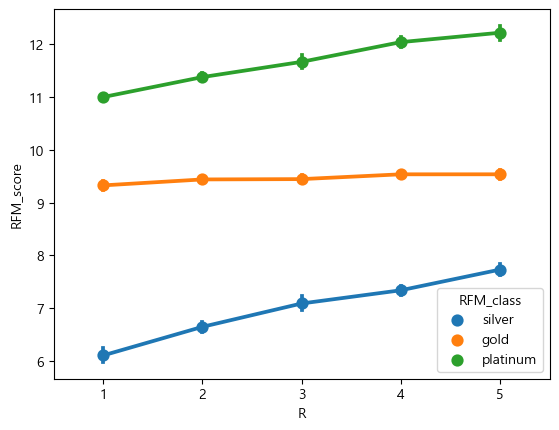

In [ ]:
# Recency(최근)에 대한 class별 pointplot
sns.pointplot(data=rfm_data, x='R', y='RFM_score', hue='RFM_class')

<Axes: xlabel='F', ylabel='RFM_score'>

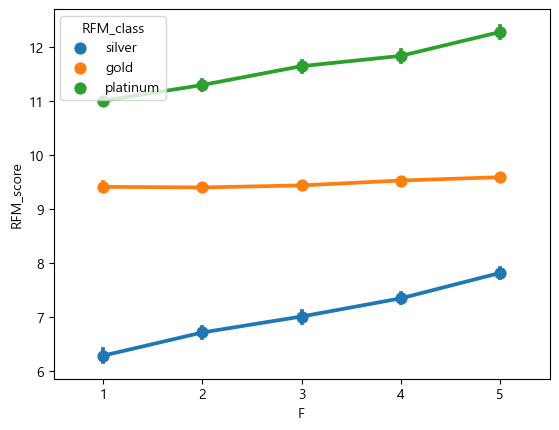

In [ ]:
sns.pointplot(data=rfm_data, x='F', y='RFM_score', hue='RFM_class')

<Axes: xlabel='M', ylabel='RFM_score'>

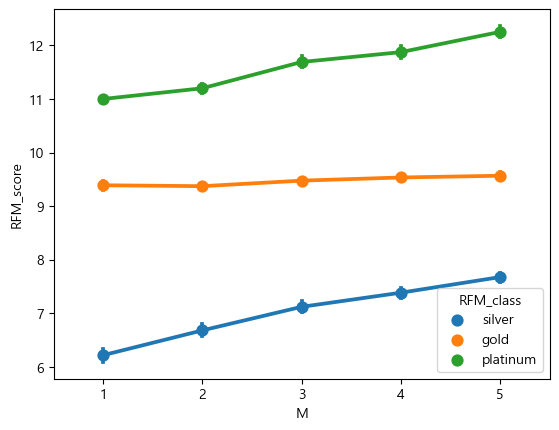

In [ ]:
sns.pointplot(data=rfm_data, x='M', y='RFM_score', hue='RFM_class')

<Axes: xlabel='R', ylabel='RFM_score'>

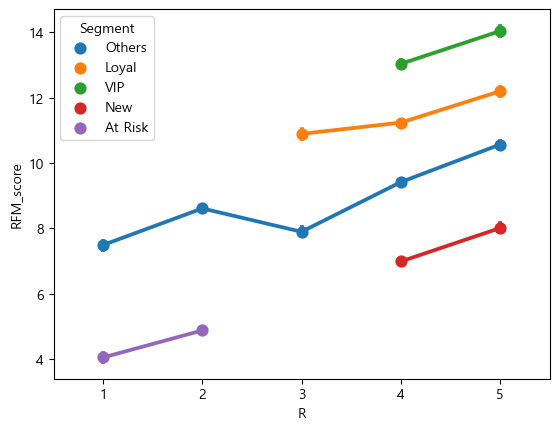

In [ ]:
# Recency(최근)에 대한 class별 pointplot
sns.pointplot(data=rfm_data, x='R', y='RFM_score', hue='Segment')

<Axes: xlabel='F', ylabel='RFM_score'>

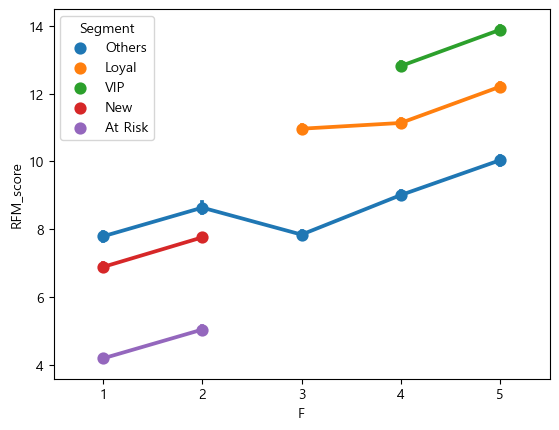

In [ ]:
sns.pointplot(data=rfm_data, x='F', y='RFM_score', hue='Segment')

<Axes: xlabel='M', ylabel='RFM_score'>

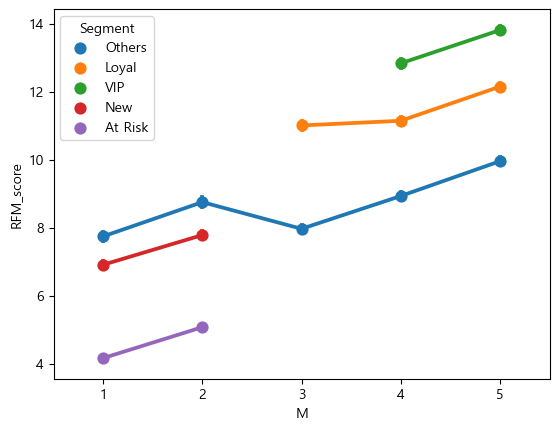

In [ ]:
sns.pointplot(data=rfm_data, x='M', y='RFM_score', hue='Segment')

<Figure size 1200x600 with 0 Axes>

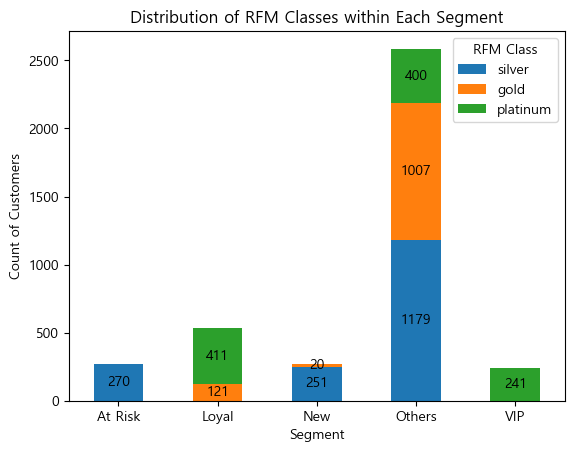

In [ ]:
# Segment별로 그룹화하고 각 세그먼트에서 RFM 클래스의 분포를 계산
rfm_class_dist = rfm_data.groupby(['Segment', 'RFM_class']).size().unstack(fill_value=0)

# 시각화 설정
plt.figure(figsize=(12, 6))
ax = rfm_class_dist.plot(kind='bar', stacked=True)
plt.title('Distribution of RFM Classes within Each Segment')
plt.xlabel('Segment')
plt.ylabel('Count of Customers')
plt.xticks(rotation=0)
plt.legend(title='RFM Class')

# 각 막대 위에 숫자 표시, 0이 아닌 값만 표시
for container in ax.containers:
    labels = [f'{int(v)}' if v != 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

plt.show()

In [ ]:
# RFM_class 별로 그룹화
rfm_data.groupby('RFM_class').agg(
    {'Recency' : 'mean'},
    {'Frequency' : 'mean'},
    {'MonetaryValue' : ['mean','sum','count']})

,Recency
RFM_class,
silver,135.730000
gold,69.635889
platinum,32.391635


In [ ]:
# RFM_class 별로 그룹화
rfm_data.groupby('RFM_class').agg(
    {'Recency' : 'mean',
    'Frequency' : 'mean',
    'MonetaryValue' : ['mean','sum','count']})

Recency  Frequency MonetaryValue             
                 mean       mean          mean    sum count
RFM_class                                                  
silver     135.730000  17.255882     47.325294  80453  1700
gold        69.635889  27.596690     62.264808  71480  1148
platinum    32.391635  35.983840     77.136882  81148  1052

In [ ]:
rfm_data.groupby('RFM_class').agg(
    {'Recency' : 'mean',
    'Frequency' : 'mean',
    'MonetaryValue' : ['mean','sum','count']}).style.background_gradient().format("{:,.0f}")

d:\Miniconda\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


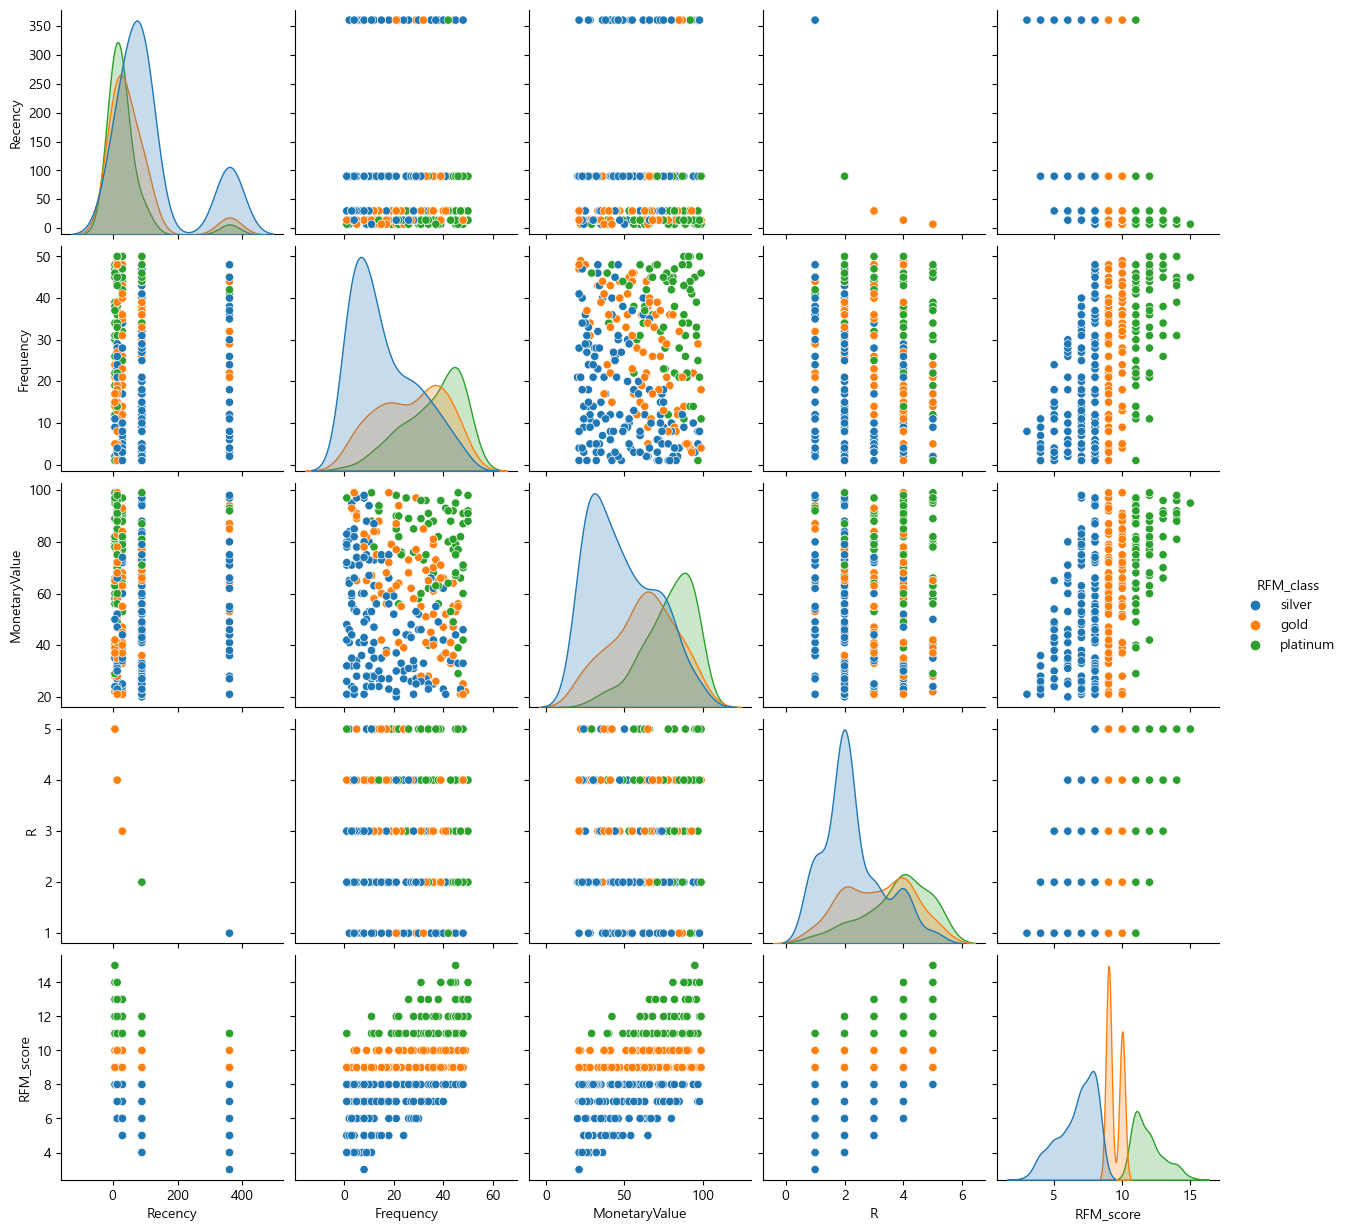

In [ ]:
# pairplot을 통해 'RFM_class'별로 분포를 시각화 
sns.pairplot(data=rfm_data.sample(300), hue='RFM_class')

In [ ]:
# .corr() 함수로 변수간 상관관계 (선형적 관계)를 분석
corr = rfm_data.select_dtypes(include='number').corr().iloc[[0,1,2,4],[0,1,2,4]]
corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.016900,0.009556,-0.443933
Frequency,-0.016900,1.000000,0.008063,0.587347
MonetaryValue,0.009556,0.008063,1.000000,0.577626
RFM_score,-0.443933,0.587347,0.577626,1.000000


d:\Miniconda\envs\ds_study\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

d:\Miniconda\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
d:\Miniconda\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


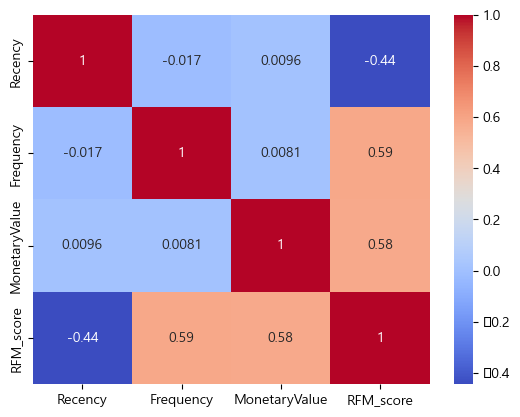

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

d:\Miniconda\envs\ds_study\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

d:\Miniconda\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
d:\Miniconda\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


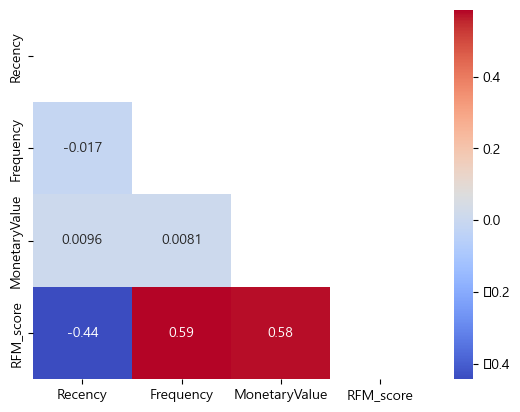

In [ ]:
# 삼각형태 heatmap
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)

In [ ]:
# RFM 분석 자료를 csv 형태로 저장 
rfm_data.to_csv('rfm_data_zb.csv')

----

In [ ]:
rfm = pd.read_csv('rfm_data_zb.csv', index_col='Customer ID')
rfm.shape

(3900, 10)

In [ ]:
# Recency, Frequency, MonetaryValue 만 가져옴
rfm_cluster = rfm.iloc[:, :3]
rfm_cluster

,Recency,Frequency,MonetaryValue
Customer ID,,,
1,14,14,53
2,14,2,64
3,7,23,73
4,7,49,90
5,360,31,49
...,...,...,...
3896,7,32,28
3897,14,41,49
3898,90,24,33


In [ ]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,3900.000000,3900.000000,3900.000000
mean,88.399744,25.351538,59.764359
std,117.338668,14.447125,23.685392
min,7.000000,1.000000,20.000000
25%,14.000000,13.000000,39.000000
50%,30.000000,25.000000,60.000000
75%,90.000000,38.000000,81.000000
max,360.000000,50.000000,100.000000


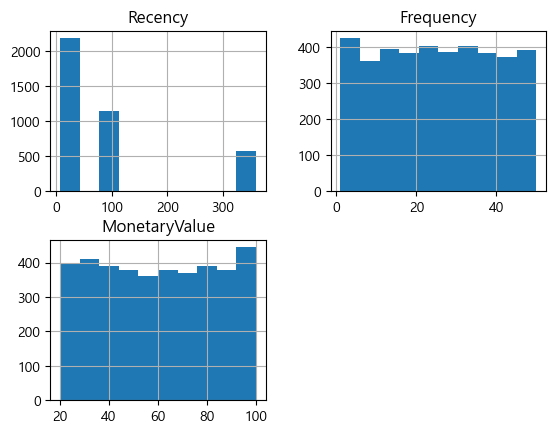

In [ ]:
rfm_cluster.hist();

In [ ]:
rfm['Recency'].value_counts()

Recency
90     1147
14     1089
360     572
30      553
7       539
Name: count, dtype: int64

In [ ]:
# Recency를 수치형으로 변환할 함수 정의 
import random 

def assign_random_number(row):
    recency = row['Recency']
    if recency == 7:
        return random.randint(1, 7)
    elif recency == 14:
        return random.randint(8, 14)
    elif recency == 30:
        return random.randint(15,30)
    elif recency == 90:
        return random.randint(31,90)
    elif recency == 360:
        return random.randint(91,360)
    else:
        return None  # 예외 처리 필요 시 None 또는 다른 값 반환

# 새로운 컬럼 추가
rfm['RecencyDays'] = rfm.apply(assign_random_number, axis=1)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,Segment,RFM_class,RecencyDays
Customer ID,,,,,,,,,,,
1,14,14,53,4,2,3,423,9,Others,gold,9
2,14,2,64,4,1,3,413,8,Others,silver,8
3,7,23,73,5,3,4,534,12,Loyal,platinum,2
4,7,49,90,5,5,5,555,15,VIP,platinum,7
5,360,31,49,1,4,2,142,7,Others,silver,357
...,...,...,...,...,...,...,...,...,...,...,...
3896,7,32,28,5,4,1,541,10,Others,gold,6
3897,14,41,49,4,5,2,452,11,Others,platinum,11
3898,90,24,33,2,3,1,231,6,Others,silver,88


In [ ]:
rfm_cluster = rfm[['RecencyDays','Frequency','MonetaryValue']]
rfm_cluster

,RecencyDays,Frequency,MonetaryValue
Customer ID,,,
1,9,14,53
2,8,2,64
3,2,23,73
4,7,49,90
5,357,31,49
...,...,...,...
3896,6,32,28
3897,11,41,49
3898,88,24,33


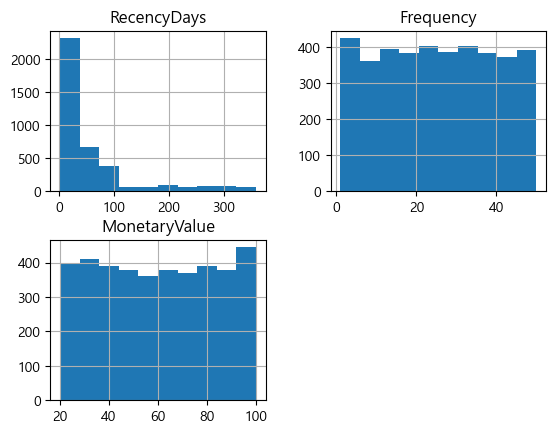

In [ ]:
rfm_cluster.hist();

In [ ]:
rfm_cluster.describe()

,RecencyDays,Frequency,MonetaryValue
count,3900.000000,3900.000000,3900.000000
mean,57.607436,25.351538,59.764359
std,79.586483,14.447125,23.685392
min,1.000000,1.000000,20.000000
25%,10.000000,13.000000,39.000000
50%,24.000000,25.000000,60.000000
75%,68.000000,38.000000,81.000000
max,359.000000,50.000000,100.000000


In [ ]:
rfm_cluster_log = np.log1p(rfm_cluster)
rfm_cluster_log.head()

,RecencyDays,Frequency,MonetaryValue
Customer ID,,,
1,2.302585,2.708050,3.988984
2,2.197225,1.098612,4.174387
3,1.098612,3.178054,4.304065
4,2.079442,3.912023,4.510860
5,5.880533,3.465736,3.912023


In [ ]:
rfm_cluster_log.describe()

,RecencyDays,Frequency,MonetaryValue
count,3900.000000,3900.000000,3900.000000
mean,3.322047,3.037989,4.018354
std,1.239575,0.790592,0.440420
min,0.693147,0.693147,3.044522
25%,2.397895,2.639057,3.688879
50%,3.218876,3.258097,4.110874
75%,4.234107,3.663562,4.406719
max,5.886104,3.931826,4.615121


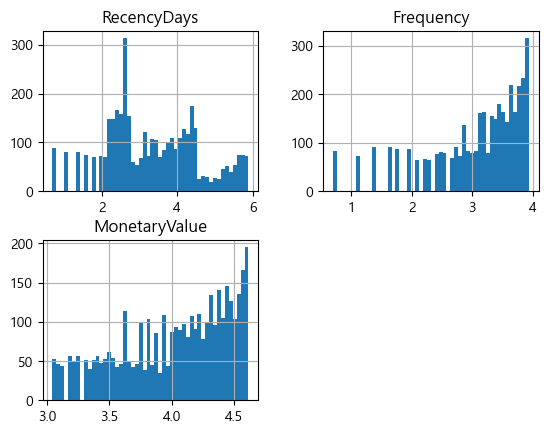

In [ ]:
rfm_cluster_log.hist(bins=50);

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.font_manager as fm

ss = StandardScaler()
X = ss.fit_transform(rfm_cluster_log)
X = pd.DataFrame(X, columns=rfm_cluster_log.columns)

In [ ]:
X

,RecencyDays,Frequency,MonetaryValue
0,-0.822534,-0.417385,-0.066696
1,-0.907542,-2.453383,0.354328
2,-1.793937,0.177187,0.648807
3,-1.002573,1.105685,1.118406
4,2.064267,0.541116,-0.241463
...,...,...,...
3895,-1.110310,0.580043,-1.478458
3896,-0.675431,0.885122,-0.241463
3897,0.941241,0.228829,-1.117246
3898,-1.793937,0.228829,0.768353


In [ ]:
pd.DataFrame(X).describe().round(2)

,RecencyDays,Frequency,MonetaryValue
count,3900.00,3900.00,3900.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-2.12,-2.97,-2.21
25%,-0.75,-0.50,-0.75
50%,-0.08,0.28,0.21
75%,0.74,0.79,0.88
max,2.07,1.13,1.36


In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

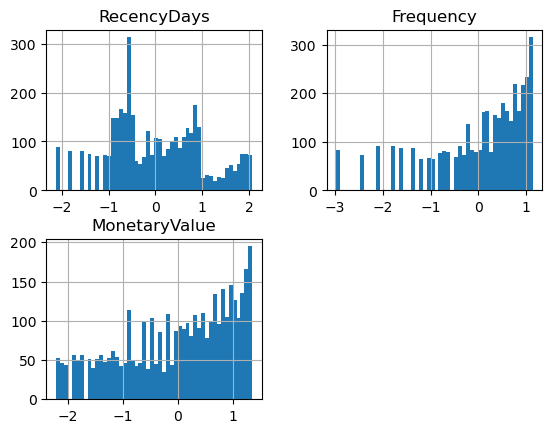

In [ ]:
X.hist(bins=50);

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


# Yeo-Johnson 변환을 적용할 함수 정의
def apply_yeojohnson_transform(data):
    transformed_data = np.zeros_like(data)  # 변환된 데이터를 저장할 배열 초기화
    
    for i, col in enumerate(data.columns):
        col_data = data[col]
        
        # Yeo-Johnson 변환 적용
        transformed_data[:, i], _ = stats.yeojohnson(col_data)
    
    return pd.DataFrame(transformed_data, columns=data.columns)

# 데이터프레임의 모든 컬럼에 Yeo-Johnson 변환 적용
df_transformed = apply_yeojohnson_transform(X)

# 결과 출력
print(df_transformed)

      RecencyDays  Frequency  MonetaryValue
0       -0.859511  -0.353735      -0.065641
1       -0.951836  -1.303000       0.383423
2       -1.943830   0.191561       0.742615
3       -1.055693   1.654828       1.382490
4        1.892497   0.674072      -0.228680
...           ...        ...            ...
3895    -1.174228   0.732692      -1.154443
3896    -0.701105   1.238438      -0.228680
3897     0.896726   0.252773      -0.913914
3898    -1.943830   0.252773       0.898005
3899     0.650719   0.790846       1.050472

[3900 rows x 3 columns]


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

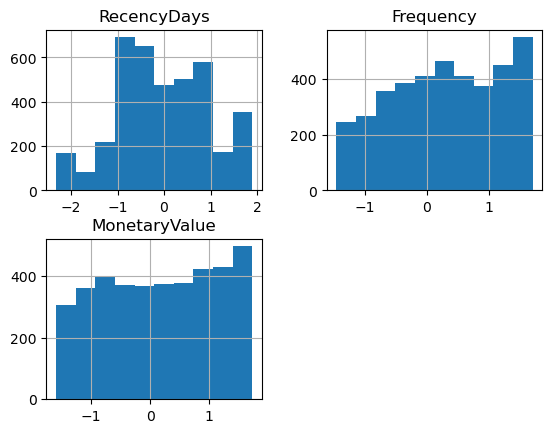

In [ ]:
df_transformed.hist();

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=8, n_init = 'auto', random_state=13)
kmeans.fit(df_transformed) # type: ignore

# 8개 군집에 중심점 
kmeans.cluster_centers_

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# 전체 거리 = 각각 데이터 포인트와 center 간에 거리의 합
kmeans.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [ ]:
inertia = []
silhouettes = []
range_n_cluster = range(2,21)

for n_cluster in range_n_cluster:
    kmeans = KMeans(n_clusters=n_cluster, n_init = 'auto', random_state=13)
    kmeans.fit(df_transformed) # type: ignore
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_transformed, labels=kmeans.labels_))
    print(n_cluster, end=',')

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
inertia

[]

In [ ]:
# inertia는 값이 작으면 작을수록 좋음 
pd.Series(inertia).plot(figsize=(6,2))

TypeError: no numeric data to plot

ValueError: x and y must have same first dimension, but have shapes (19,) and (0,)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

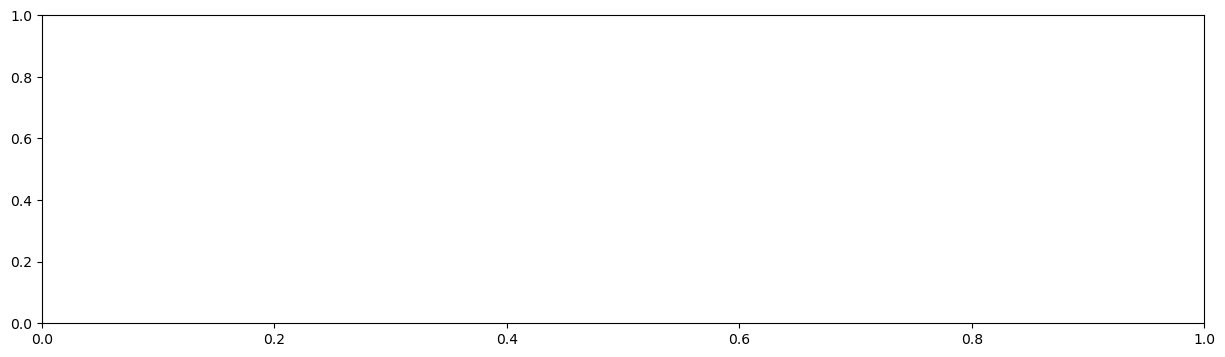

In [ ]:
# matplotlib 로도 그려보자 
plt.figure(figsize=(15,4))
plt.plot(range_n_cluster, inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.xticks(range_n_cluster)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19,) and (0,)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

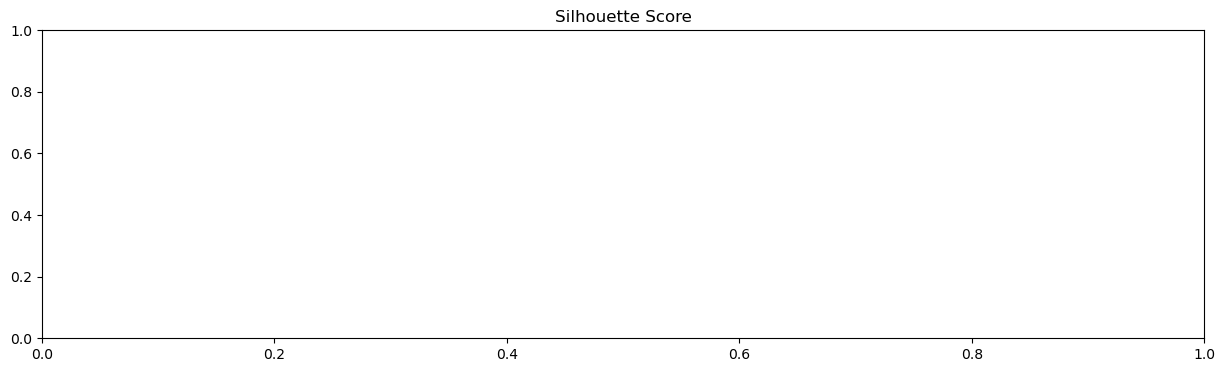

In [ ]:
# 실루엣 점수를 보자 
plt.figure(figsize=(15,4))
plt.title('Silhouette Score')
plt.plot(range_n_cluster, silhouettes)
plt.show()

In [ ]:
# 우리가 이전에 silver, gold, platinum 세개로 나누었으니깐 cluster도 3개로 군집화해서
# 잘 군집이 되는지 한번 봐보자 
n_cluster = 3
kmeans = KMeans(n_clusters=n_cluster, n_init='auto', random_state=13)
kmeans.fit(df_transformed)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
kmeans.labels_

AttributeError: 'KMeans' object has no attribute 'labels_'

In [ ]:
kmeans.cluster_centers_

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [ ]:
pd.Series(kmeans.labels_).value_counts()

AttributeError: 'KMeans' object has no attribute 'labels_'

In [ ]:
silhouette_avg = silhouette_score(df_transformed, kmeans.labels_)
silhouette_avg

AttributeError: 'KMeans' object has no attribute 'labels_'

AttributeError: 'KMeans' object has no attribute 'labels_'

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

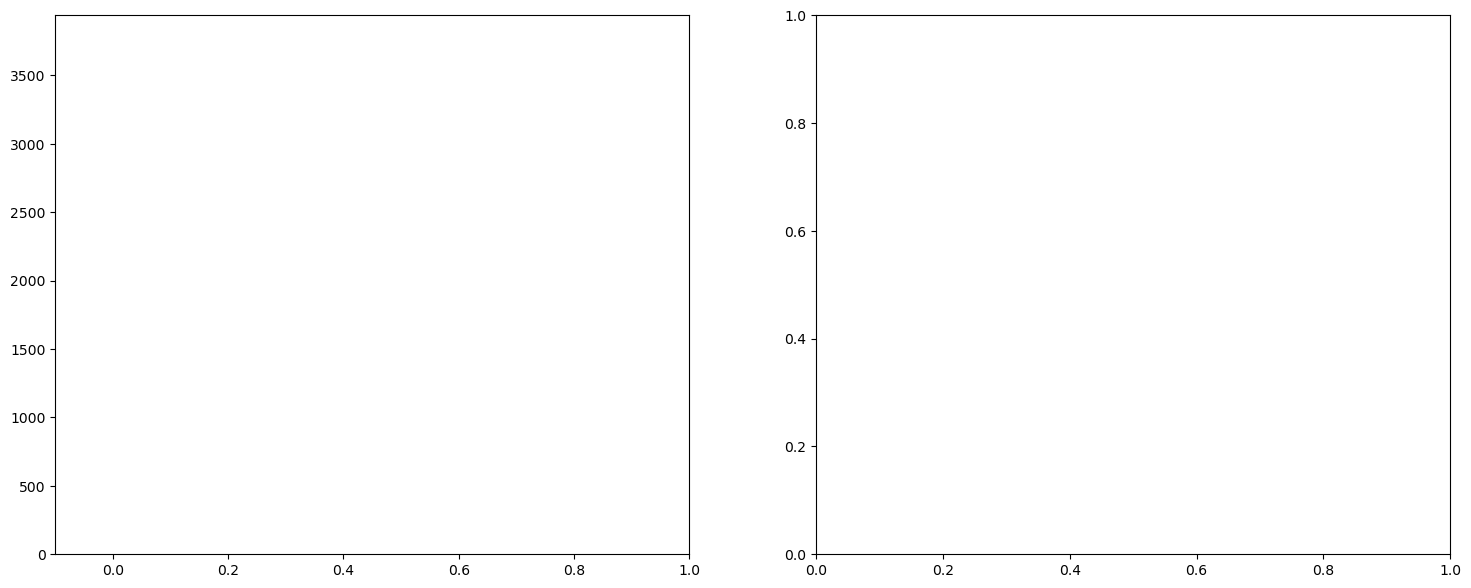

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df_transformed) + (n_cluster + 1) * 10])

cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(df_transformed, cluster_labels)

y_lower = 10
for i in range(n_cluster):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_cluster)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]);


In [ ]:
rfm['Cluster'] = kmeans.labels_
rfm

AttributeError: 'KMeans' object has no attribute 'labels_'

In [ ]:
pd.crosstab(rfm['RFM_class'], rfm['Cluster'])

KeyError: 'Cluster'

KeyError: 'Cluster'

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

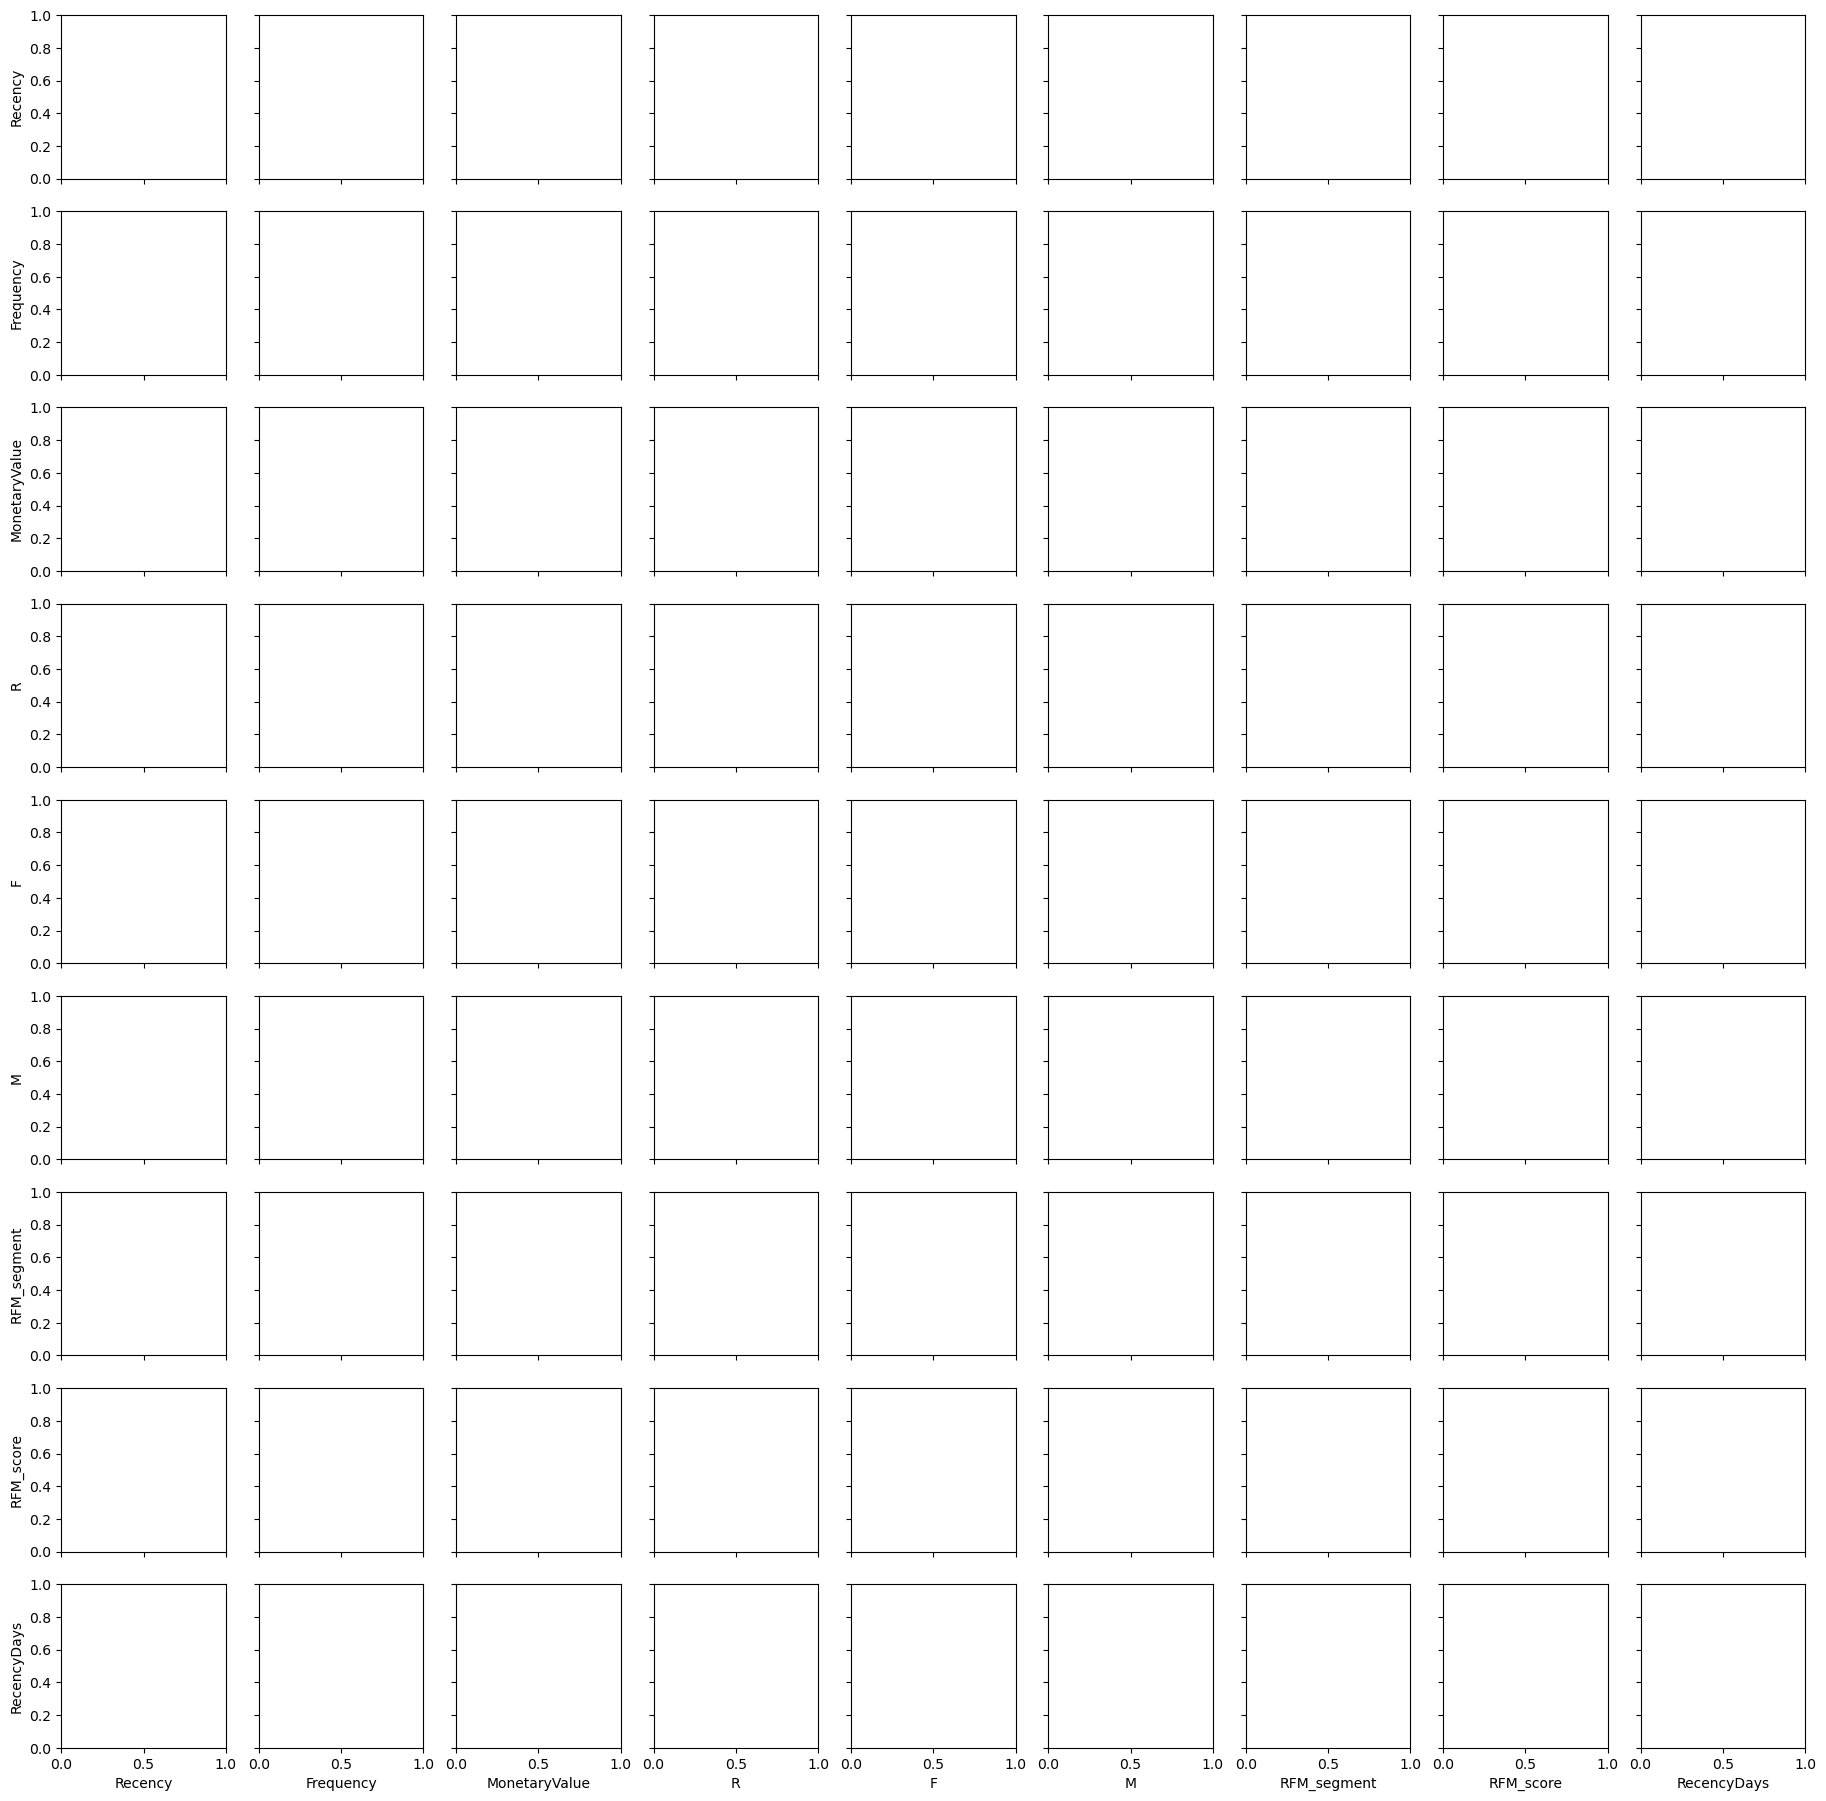

In [ ]:
sns.pairplot(data=rfm, hue='Cluster')

In [ ]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,Population2023,Age Group,state_id,income,population_norm,income_norm,Age_cat
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Fortnightly,4526154.0,50대,KY,277747.0,0.116159,0.071915,50대
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Fortnightly,1395722.0,10대,ME,91081.0,0.035820,0.023583,10대
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,7001399.0,50대,MA,733860.0,0.179683,0.190012,50대
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,1095962.0,20대,RI,77322.0,0.028127,0.020020,20대
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,31,PayPal,Annually,4233358.0,40대,OR,316461.0,0.108645,0.081939,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,32,Venmo,Weekly,8715698.0,40대,VA,707085.0,0.223679,0.183080,40대
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,41,Bank Transfer,Bi-Weekly,3207004.0,50대,IA,248923.0,0.082304,0.064452,50대
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,24,Venmo,Quarterly,9290841.0,40대,NJ,799305.0,0.238439,0.206957,40대
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,24,Venmo,Weekly,5737915.0,40대,MN,471820.0,0.147257,0.122164,40대


In [ ]:
rfm_set = rfm.reset_index()
rfm_set

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,RecencyDays
0,1,14,14,53,4,2,3,423,9,gold,12
1,2,14,2,64,4,1,3,413,8,silver,13
2,3,7,23,73,5,3,4,534,12,platinum,1
3,4,7,49,90,5,5,5,555,15,platinum,3
4,5,360,31,49,1,4,2,142,7,silver,228
...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,7,32,28,5,4,1,541,10,gold,2
3896,3897,14,41,49,4,5,2,452,11,platinum,11
3897,3898,90,24,33,2,3,1,231,6,silver,31
3898,3899,7,24,77,5,3,4,534,12,platinum,1


In [ ]:
import pandas as pd

df = pd.read_csv('merge_all.csv')
df.groupby(['RFM_class','Gender'])['Age_cat'].value_counts(1).to_frame().style.background_gradient()

FileNotFoundError: [Errno 2] No such file or directory: 'merge_all.csv'

In [ ]:
df.groupby('RFM_class')['Age_cat'].count() / 3900 * 100

NameError: name 'df' is not defined

In [ ]:
# 원래 raw_data 와 RFM 으로 고객 segment 한 데이터 합치기 
cols = rfm.columns.tolist()

data[cols] = rfm_set[cols]
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,RecencyDays
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,14,53,4,2,3,423,9,gold,12
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,14,2,64,4,1,3,413,8,silver,13
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,7,23,73,5,3,4,534,12,platinum,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,7,49,90,5,5,5,555,15,platinum,3
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,360,31,49,1,4,2,142,7,silver,228


In [ ]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Population2023',
       'Age Group', 'state_id', 'income', 'population_norm', 'income_norm',
       'Age_cat', 'Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M',
       'RFM_segment', 'RFM_score', 'RFM_class', 'RecencyDays'],
      dtype='object')

In [ ]:
# platinum, gold, silver 고객 segment 별로 어떤 특성이 있는지 각 features 분석하기 
df.groupby(['RFM_class','Gender', 'Age_cat']).agg({
    'RecencyDays' : 'mean',
    'Frequency' : 'mean',
    'MonetaryValue' : ['mean','sum']
}).unstack().style.background_gradient().format("{:,.1f}")

NameError: name 'df' is not defined

In [ ]:
# rfm_scores와 컬럼 간의 상관관계 분석
# 먼저 string형 labelencoder
from sklearn.preprocessing import LabelEncoder

obj_columns = ['Gender', 'Category', 'Subscription Status', 'Discount Applied']

for col in obj_columns:
    le = LabelEncoder()
    le.fit(data[col])

    data[col+'_enco'] = le.transform(data[col])

In [ ]:
data.select_dtypes(include=[np.number]).corr().style.background_gradient()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Population2023,income,population_norm,income_norm,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RecencyDays,Gender_enco,Category_enco,Subscription Status_enco,Discount Applied_enco
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159,0.011199,0.010528,0.011199,0.010528,0.005401,-0.039159,0.011048,-0.010594,-0.040356,0.007676,-0.014764,-0.025073,0.002231,-0.807960,-0.004133,-0.768960,-0.857496
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445,-0.009646,-0.010893,-0.009646,-0.010893,0.016538,0.040445,-0.010424,-0.009725,0.041181,-0.010938,-0.005369,0.012490,0.015143,0.002763,0.003546,0.006492,0.004366
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063,0.001994,0.002011,0.001994,0.002011,0.009556,0.008063,1.000000,-0.012473,0.003184,0.980300,-0.001485,0.577626,0.014544,-0.014044,-0.017841,-0.006996,-0.017798
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229,0.026556,0.025837,0.026556,0.025837,0.003645,0.004229,0.030776,-0.004025,0.006283,0.034434,-0.002954,0.021969,0.009901,0.008164,-0.000299,-0.006368,-0.012486
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000,-0.021716,-0.025049,-0.021716,-0.025049,-0.016900,1.000000,0.008063,0.005258,0.979826,0.009885,0.110257,0.587347,-0.007917,0.035873,-0.015669,0.030859,0.023537
Population2023,0.011199,-0.009646,0.001994,0.026556,-0.021716,1.000000,0.984413,1.000000,0.984413,0.001800,-0.021716,0.001994,0.003985,-0.017864,0.001093,0.002058,-0.007716,0.006536,-0.012819,-0.010232,-0.003454,-0.009060
income,0.010528,-0.010893,0.002011,0.025837,-0.025049,0.984413,1.000000,0.984413,1.000000,0.000220,-0.025049,0.002011,0.004684,-0.021286,0.000306,0.002377,-0.009822,0.005584,-0.009484,-0.010452,-0.003187,-0.010352
population_norm,0.011199,-0.009646,0.001994,0.026556,-0.021716,1.000000,0.984413,1.000000,0.984413,0.001800,-0.021716,0.001994,0.003985,-0.017864,0.001093,0.002058,-0.007716,0.006536,-0.012819,-0.010232,-0.003454,-0.009060
income_norm,0.010528,-0.010893,0.002011,0.025837,-0.025049,0.984413,1.000000,0.984413,1.000000,0.000220,-0.025049,0.002011,0.004684,-0.021286,0.000306,0.002377,-0.009822,0.005584,-0.009484,-0.010452,-0.003187,-0.010352
Recency,0.005401,0.016538,0.009556,0.003645,-0.016900,0.001800,0.000220,0.001800,0.000220,1.000000,-0.016900,0.009556,-0.803994,-0.018954,0.012970,-0.800637,-0.443933,0.911887,0.000491,-0.010289,0.003180,-0.010340


In [ ]:
# 라벨링 분류 
# silver, gold, platinum
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['RFM_class'])

data['RFM_class'+'_enco'] = le.transform(data['RFM_class'])
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,M,RFM_segment,RFM_score,RFM_class,RecencyDays,Gender_enco,Category_enco,Subscription Status_enco,Discount Applied_enco,RFM_class_enco
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,3,423,9,gold,12,1,1,1,1,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,3,413,8,silver,13,1,1,1,1,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,4,534,12,platinum,1,1,1,1,1,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,5,555,15,platinum,3,1,2,1,1,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,2,142,7,silver,228,1,1,1,1,2


In [ ]:
# 가독성을 위해 컬럼을 Label 로 바꿈 
data.rename(columns={'RFM_class_enco' : 'Label'}, inplace=True)

In [ ]:
# 데이터를 분리해서 DecisionTree 기반 분류 예측 모델 만들기 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = data[['Purchase Amount (USD)','Previous Purchases','Recency', 'Gender_enco', 'Subscription Status_enco','Discount Applied_enco']]
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

rfm_tree = DecisionTreeClassifier(max_depth=4, random_state=13)
rfm_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [ ]:
pred = rfm_tree.predict(X_test)
print('accuracy_score : ', accuracy_score(y_test, pred))

accuracy_score :  0.8038461538461539


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

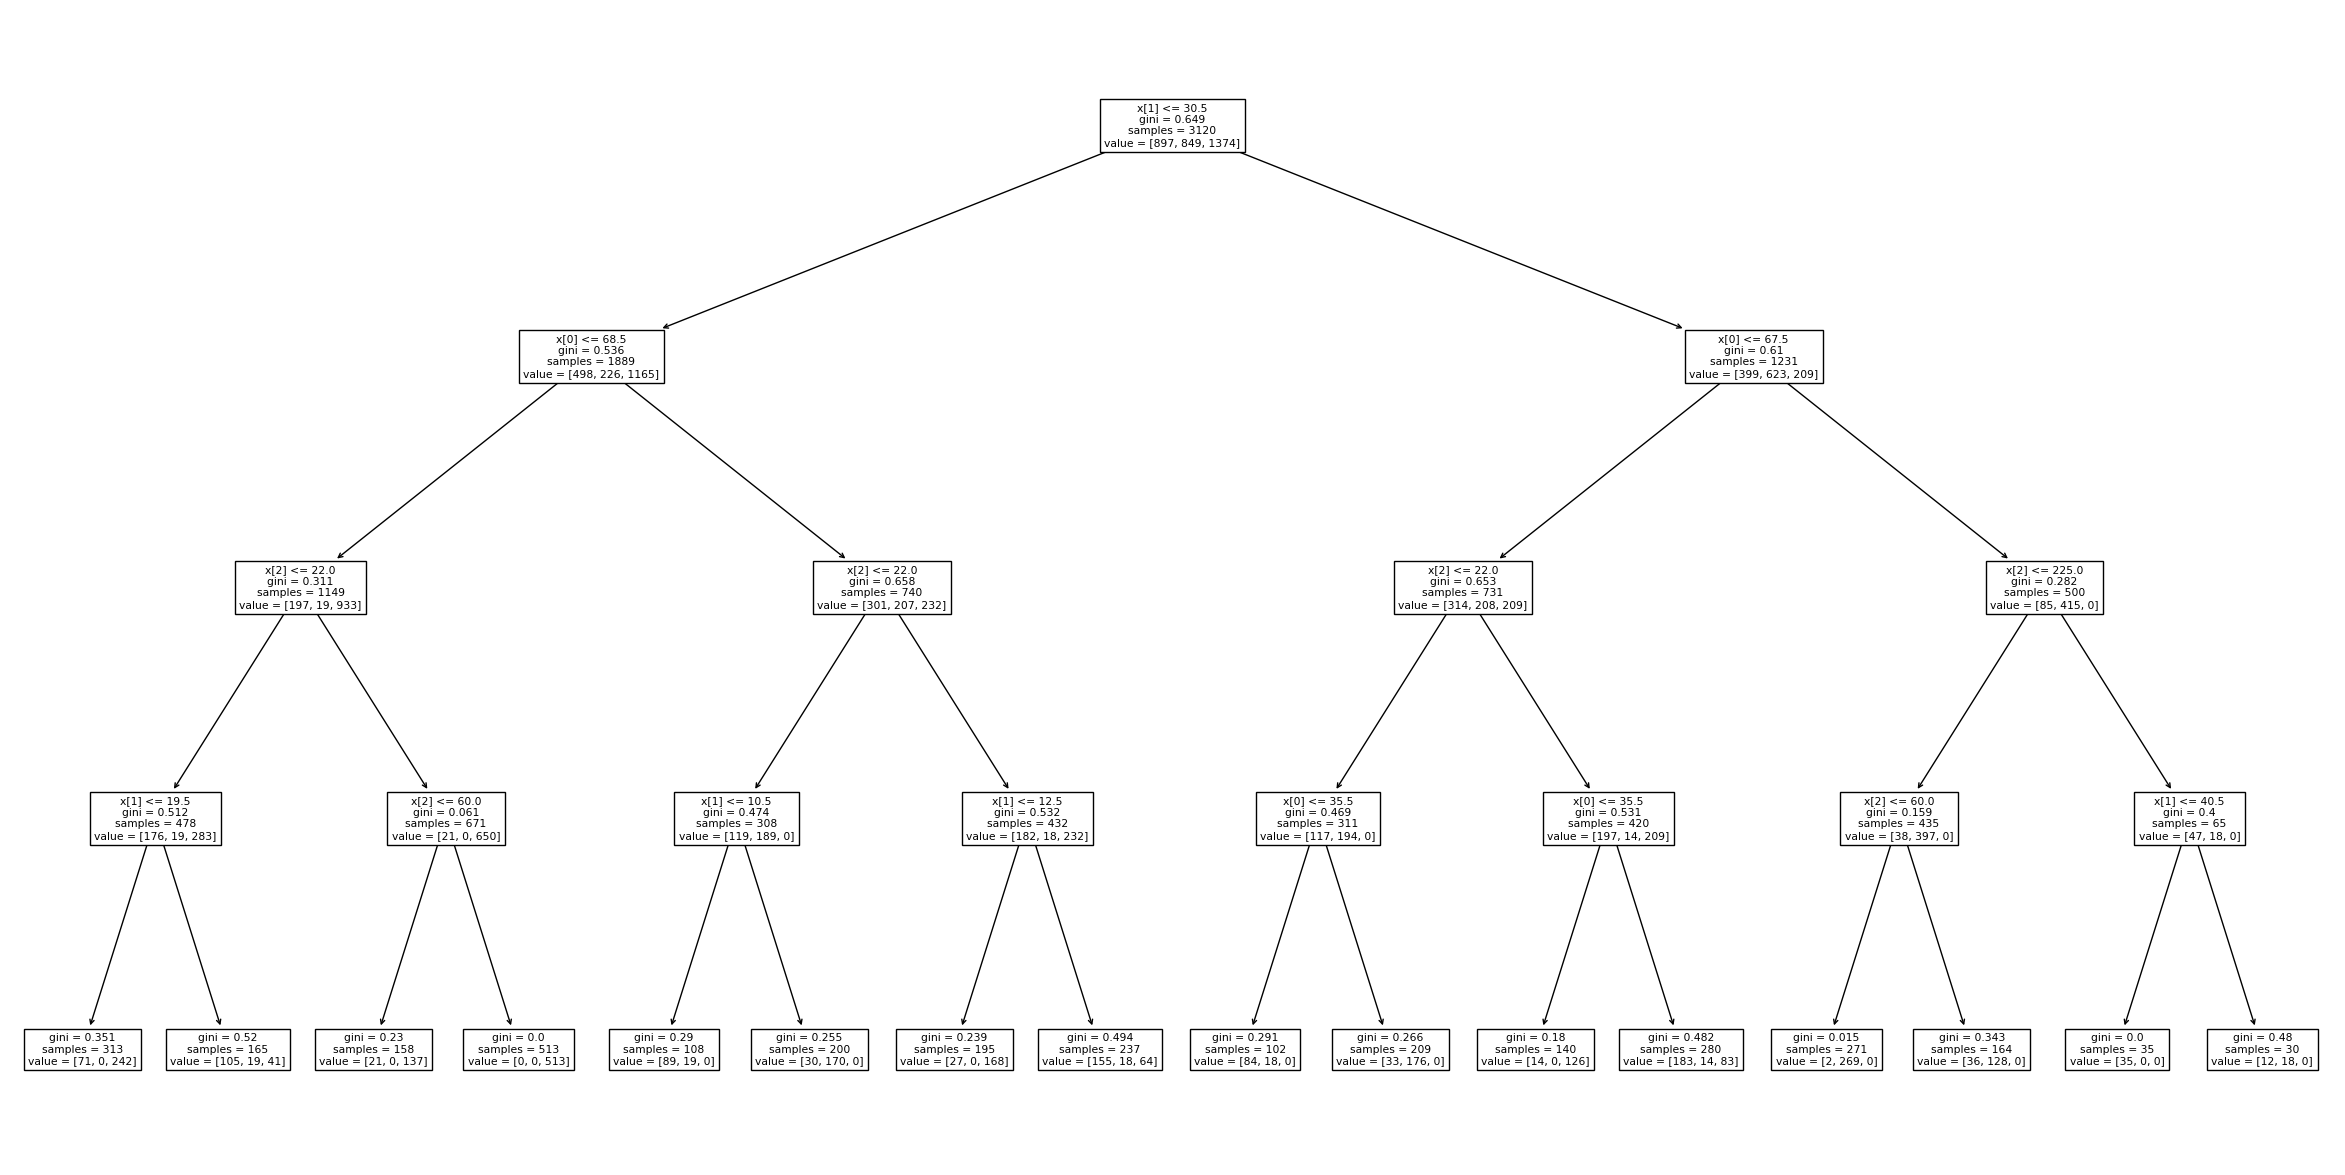

In [ ]:
from sklearn.tree import plot_tree # type: ignore
plt.figure(figsize=(30,15))
plot_tree(rfm_tree);

In [ ]:
data.to_csv('merge_all.csv')